In [105]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, log_loss)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# ==============================================
# Import ALL Classification Models
# ==============================================

# Linear Models
from sklearn.linear_model import (LogisticRegression,
                                  RidgeClassifier,
                                  SGDClassifier,
                                  PassiveAggressiveClassifier)

# Tree-based Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier,
                              ExtraTreesClassifier,
                              BaggingClassifier,
                              StackingClassifier,
                              VotingClassifier,
                              HistGradientBoostingClassifier)

# SVM Models
from sklearn.svm import SVC, LinearSVC, NuSVC

# Naive Bayes Models
from sklearn.naive_bayes import (GaussianNB,
                                 BernoulliNB,
                                 MultinomialNB,
                                 ComplementNB,
                                 CategoricalNB)

# Discriminant Analysis
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)

# Nearest Neighbors
from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier,
                               NearestCentroid)

# Neural Networks
from sklearn.neural_network import MLPClassifier
# Ensemble Methods
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Semi-supervised
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

# Other classifiers
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import IsolationForest

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from typing import Union, Tuple, Dict, List, Optional
from scipy import stats               # General statistical tests and utilities
from scipy.stats import zscore, randint, loguniform, uniform  # For z-score and sampling distributions

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


**Data Loading**

In [2]:
train_df = pd.read_csv('/content/titanic_train_data.csv')
test_df = pd.read_csv('/content/titanic_test_data.csv')

In [3]:
print('Shape of train data: ', train_df.shape)
print('Shape of test data: ', test_df.shape)

Shape of train data:  (891, 12)
Shape of test data:  (418, 11)


**Data Overview**

In [4]:
def safe_sample(train_df: pd.DataFrame, num: int):
    # Corrected: Use the passed argument train_df instead of an undefined variable df
    return train_df.sample(min(num, len(train_df)), random_state=42)

# Display first 3 rows of the DataFrame (or fewer if there aren't enough rows)
print("\nFirst 3 rows:")
display(train_df.head(3))

# Display last 3 rows
print("\nLast 3 rows:")
display(train_df.tail(3))

# Display 3 random rows
print("\nRandom 3 rows:")
display(safe_sample(train_df, num=3))


First 3 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



Last 3 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



Random 3 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


In [5]:
#Getting information of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Column | Analysis**

COLUMN DATA TYPES ANALYSIS


,count
int64,5
object,5
float64,2


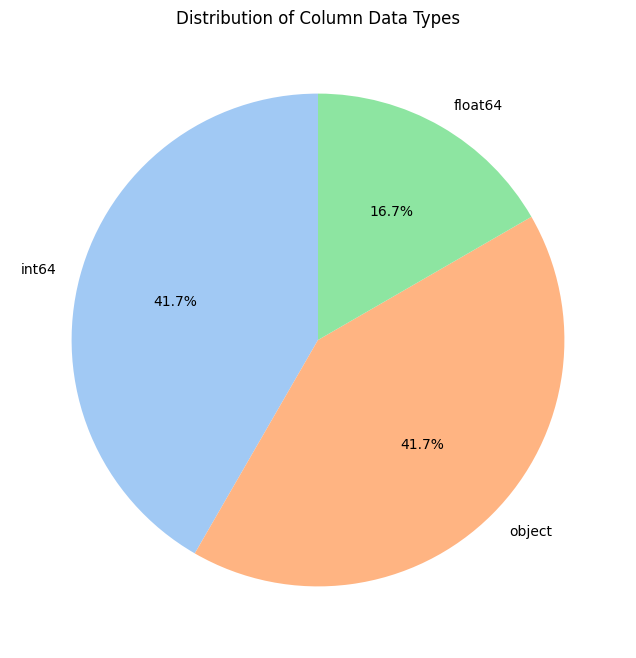

In [6]:
def column_types_analysis(df: pd.DataFrame):
    """Analyze and visualize column data types distribution.

    Args:
        df: pandas DataFrame to analyze
    """
    print("="*50)
    print("COLUMN DATA TYPES ANALYSIS")
    print("="*50)

    type_counts = df.dtypes.value_counts()
    display(type_counts)

    # Pass figsize as a tuple (width, height)
    plt.figure(figsize=(12, 8))
    type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                    colors=sns.color_palette('pastel'))
    plt.title('Distribution of Column Data Types')
    plt.ylabel('')
    plt.show()
# Run Function
column_types_analysis(df=train_df)

**Uniques Values | Analysis**

UNIQUE VALUES ANALYSIS

Number of Unique Values per Column:
PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          148
Age             89
SibSp            7
Parch            7
Embarked         4
Pclass           3
Survived         2
Sex              2
dtype: int64


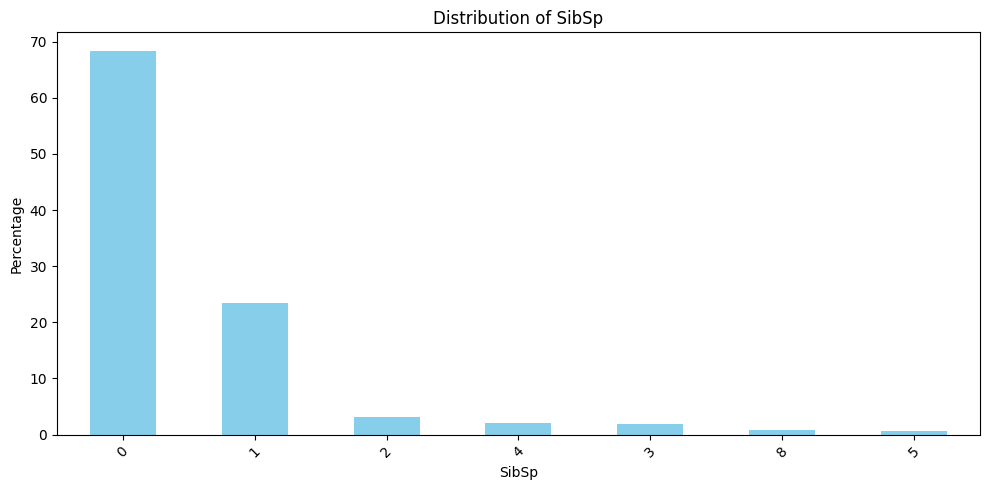

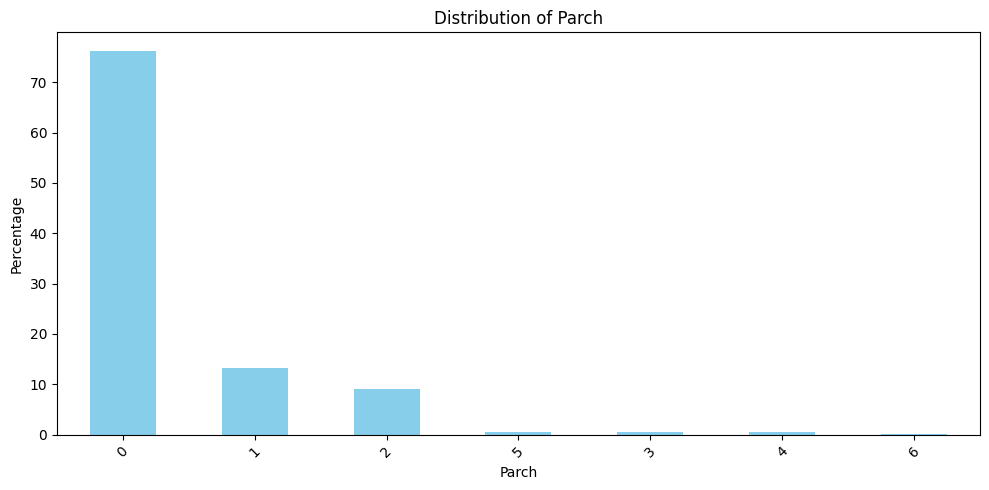

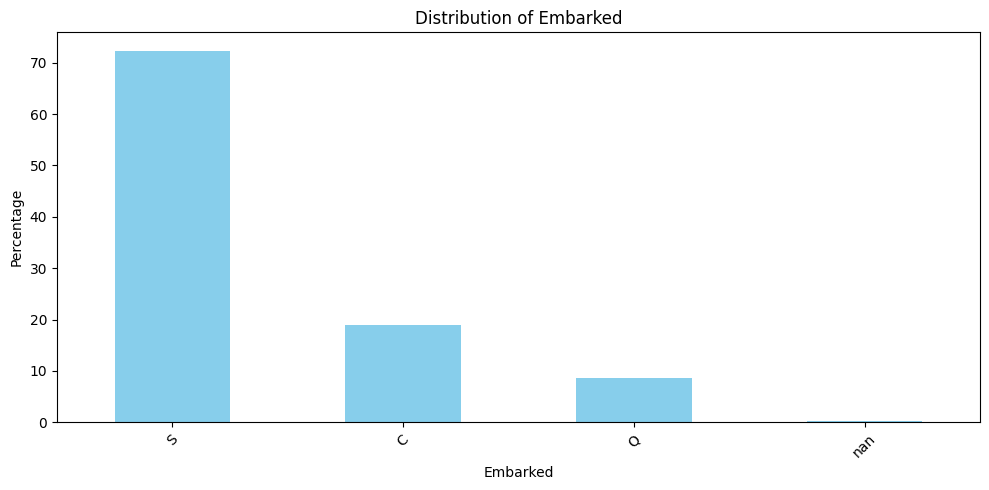

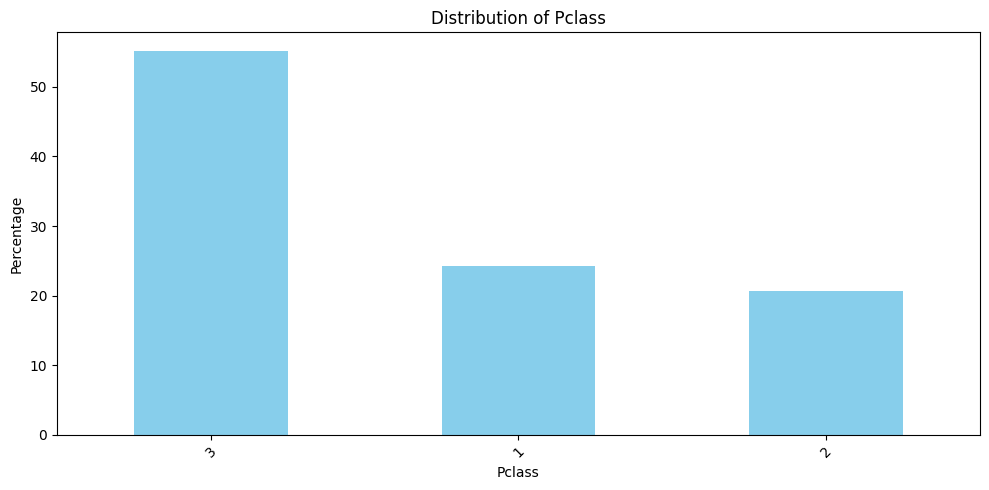

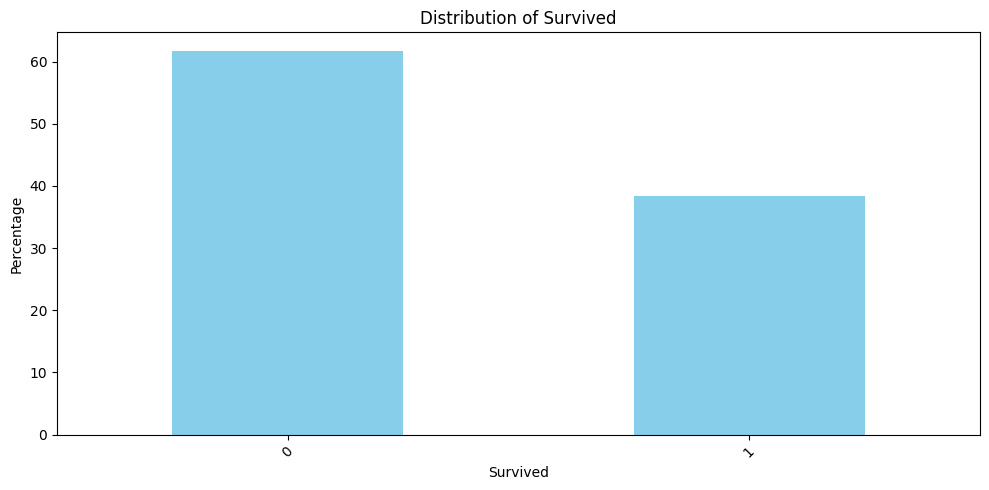

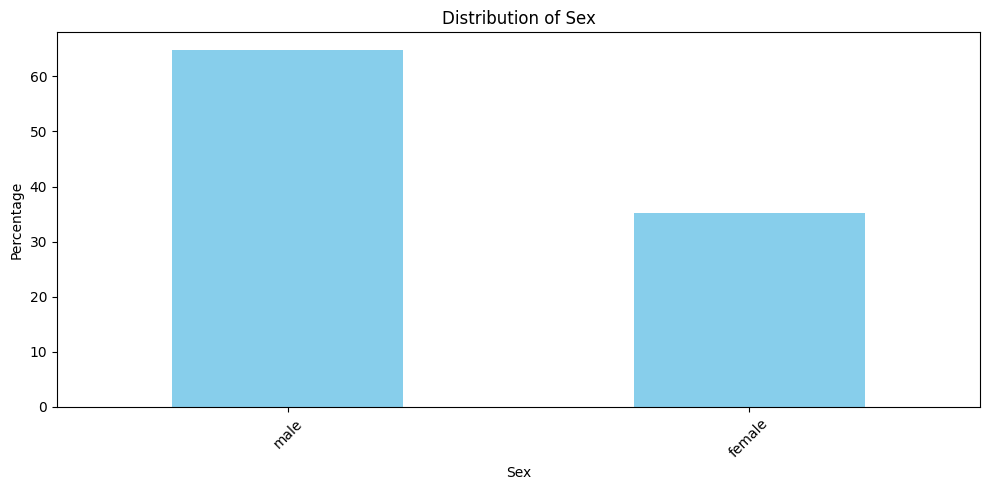

In [7]:
def unique_values_analysis(df: pd.DataFrame,
                           columns: Optional[Union[str, List[str]]] = None,
                           plot: bool = True,
                           max_unique_plot: int = 20) -> None:
    """
    Analyze and visualize unique values in specified DataFrame columns.

    Args:
        df: pandas DataFrame to analyze.
        columns: Column(s) to analyze. If None, all columns are used.
        plot: Whether to generate visualizations.
        max_unique_plot: Max number of unique values to plot per column.
    """

    print("="*50)
    print("UNIQUE VALUES ANALYSIS")
    print("="*50)

    # If columns is None, analyze all columns
    if columns is None:
        columns = df.columns.tolist()
    # Ensure columns is a list for iteration, even if a single column name was passed as a string
    elif isinstance(columns, str):
        columns = [columns]

    # Filter only valid columns that exist in the DataFrame
    columns = [col for col in columns if col in df.columns]

    # Check if any valid columns were found
    if not columns:
        print("No valid columns found to analyze.")
        return

    # Calculate number of unique values per column, sort them in descending order
    unique_counts = df[columns].nunique(dropna=False).sort_values(ascending=False)

    print("\nNumber of Unique Values per Column:")
    print(unique_counts)

    if plot:
        # Filter columns that have a reasonable number of unique values to plot
        # Also ensure the column exists in the original df to avoid KeyError later
        cols_to_plot = [col for col in unique_counts[unique_counts <= max_unique_plot].index if col in df.columns]


        for col in cols_to_plot:
            plt.figure(figsize=(10, 5))  # Set figure size within the function

            # For categorical or low-cardinality columns
            if df[col].dtype in ['object', 'category'] or unique_counts[col] <= 10:
                # Get value counts including NaN, normalize to percentage
                value_counts = df[col].value_counts(normalize=True, dropna=False) * 100

                # Truncate to top N if too many unique categories
                if len(value_counts) > max_unique_plot:
                    value_counts = value_counts.head(max_unique_plot)
                    title_suffix = f" (Top {max_unique_plot})"
                else:
                    title_suffix = ""

                # Bar plot for categorical distribution
                value_counts.plot(kind='bar', color='skyblue')
                plt.title(f'Distribution of {col}{title_suffix}')
                plt.ylabel('Percentage')
                plt.xticks(rotation=45)

            # For numerical columns
            else:
                # Drop NaN for plotting distributions
                numeric_data = df[col].dropna()

                # Use seaborn histogram with KDE (kernel density estimate)
                sns.histplot(numeric_data, kde=True, color='skyblue', bins=30)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')

            plt.tight_layout()
            plt.show()
# Usage
unique_values_analysis(train_df)

**Sataistical Analysis | Data**

In [8]:
def describe_data(df: pd.DataFrame, include_all: bool = False) -> None:
    """
    Generate and display descriptive statistics for a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        include_all (bool): If True, include all columns (numeric + categorical) in the statistics.
                            If False, show numeric and categorical stats separately.
    """
    print("=" * 50)
    print("DESCRIPTIVE STATISTICS")
    print("=" * 50)

    # If DataFrame is empty, print a message and exit
    if df.empty:
        print("The DataFrame is empty. No statistics to display.")
        return

    if include_all:
        # Show descriptive stats for all column types
        print(df.describe(include='all').to_string())
    else:
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=np.number).columns

        if not numeric_cols.empty:
            print("\nNumeric Columns Statistics:")
            # Describe numeric columns and print as a string for readability
            print(df[numeric_cols].describe().to_string())
        else:
            print("\nNo numeric columns found.")

        # Select categorical (object or category) columns
        cat_cols = df.select_dtypes(include=['object', 'category']).columns

        if not cat_cols.empty:
            print("\nCategorical Columns Statistics:")
            # Describe categorical columns and print as a string
            print(df[cat_cols].describe().to_string())
        else:
            print("\nNo categorical columns found.")

# Describe numeric and categorical separately
describe_data(train_df)

# Describe all columns at once
describe_data(train_df, include_all=True)

DESCRIPTIVE STATISTICS

Numeric Columns Statistics:
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Categorical Columns Statistics:
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     8

**Univariate Categorical Columns Analysis**


CATEGORICAL ANALYSIS FOR: Name

Summary Statistics:
- Missing values: 0 (0.0%)
- Unique values: 891

Top 20 Values (of 891):
Name
van Melkebeke, Mr. Philemon                       1
Abbing, Mr. Anthony                               1
Abbott, Mr. Rossmore Edward                       1
Abbott, Mrs. Stanton (Rosa Hunt)                  1
Abelson, Mr. Samuel                               1
Abelson, Mrs. Samuel (Hannah Wizosky)             1
Adahl, Mr. Mauritz Nils Martin                    1
Adams, Mr. John                                   1
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)    1
Aks, Mrs. Sam (Leah Rosen)                        1
Albimona, Mr. Nassef Cassem                       1
Wright, Mr. George                                1
Woolner, Mr. Hugh                                 1
Wiseman, Mr. Phillippe                            1
Windelov, Mr. Einar                               1
Williams-Lambert, Mr. Fletcher Fellows            1
Williams, Mr. Leslie                 

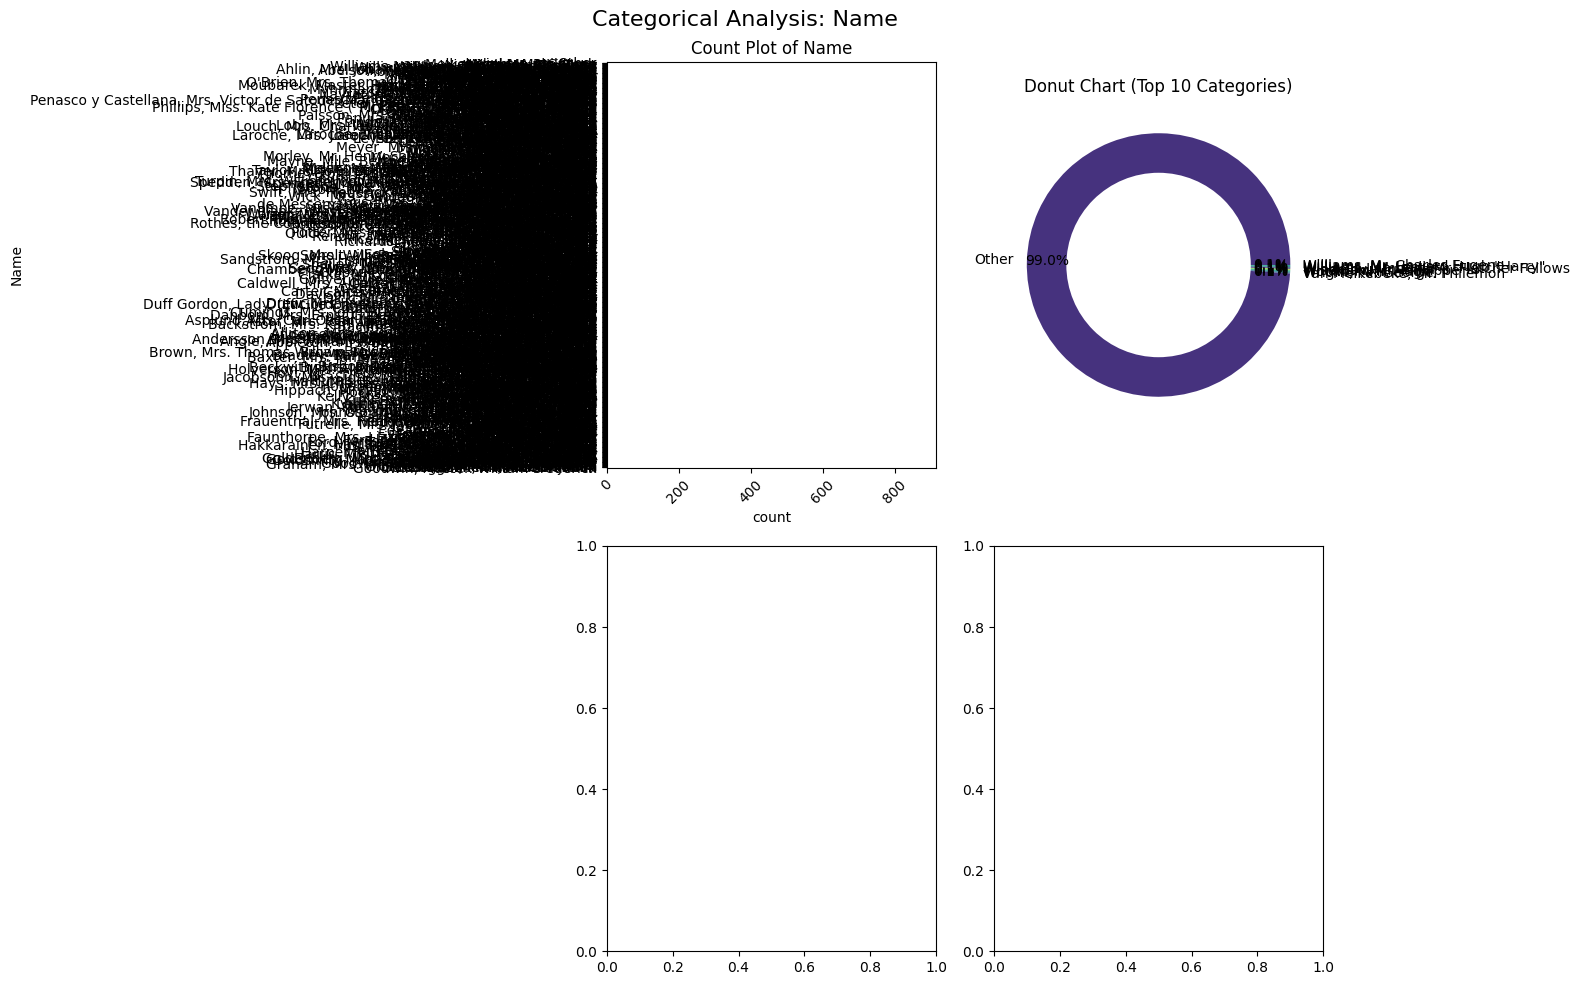


--------------------------------------------------

CATEGORICAL ANALYSIS FOR: Sex

Summary Statistics:
- Missing values: 0 (0.0%)
- Unique values: 2

Value Counts:
Sex
male      577
female    314

Value Percentages:
Sex
male      64.8%
female    35.2%


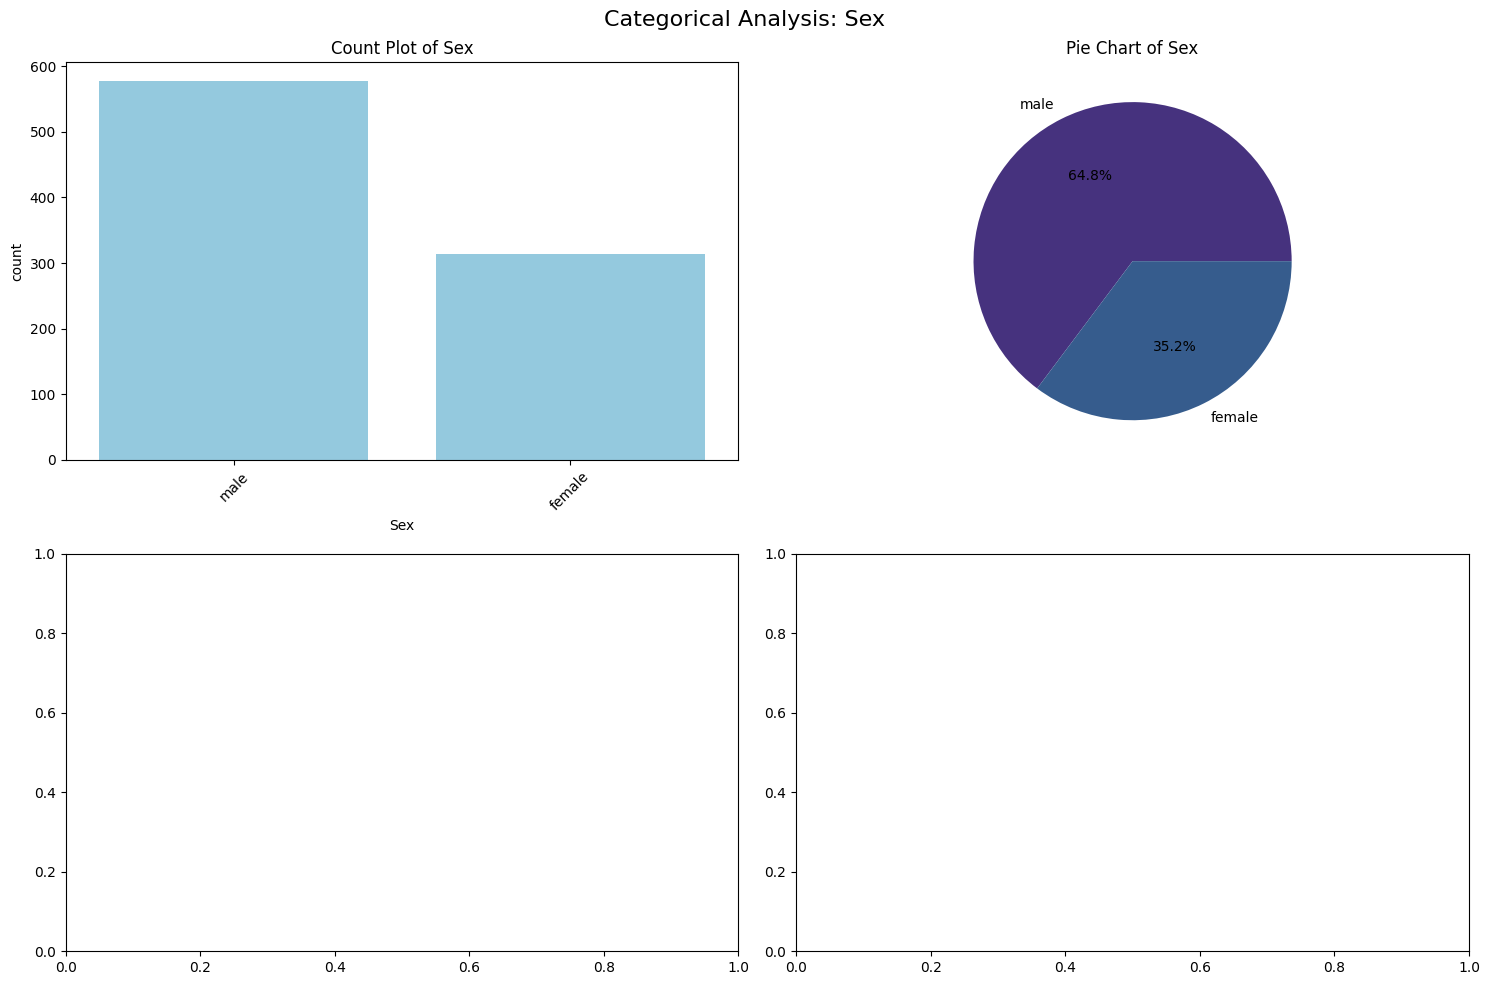


--------------------------------------------------

CATEGORICAL ANALYSIS FOR: Ticket

Summary Statistics:
- Missing values: 0 (0.0%)
- Unique values: 681

Top 20 Values (of 681):
Ticket
1601            7
CA. 2343        7
347082          7
CA 2144         6
3101295         6
347088          6
382652          5
S.O.C. 14879    5
349909          4
2666            4
19950           4
W./C. 6608      4
4133            4
347077          4
17421           4
LINE            4
PC 17757        4
113760          4
113781          4
110152          3

Top Value Percentages:
Ticket
1601            0.8%
CA. 2343        0.8%
347082          0.8%
CA 2144         0.7%
3101295         0.7%
347088          0.7%
382652          0.6%
S.O.C. 14879    0.6%
349909          0.4%
2666            0.4%
19950           0.4%
W./C. 6608      0.4%
4133            0.4%
347077          0.4%
17421           0.4%
LINE            0.4%
PC 17757        0.4%
113760          0.4%
113781          0.4%
110152          0.3%


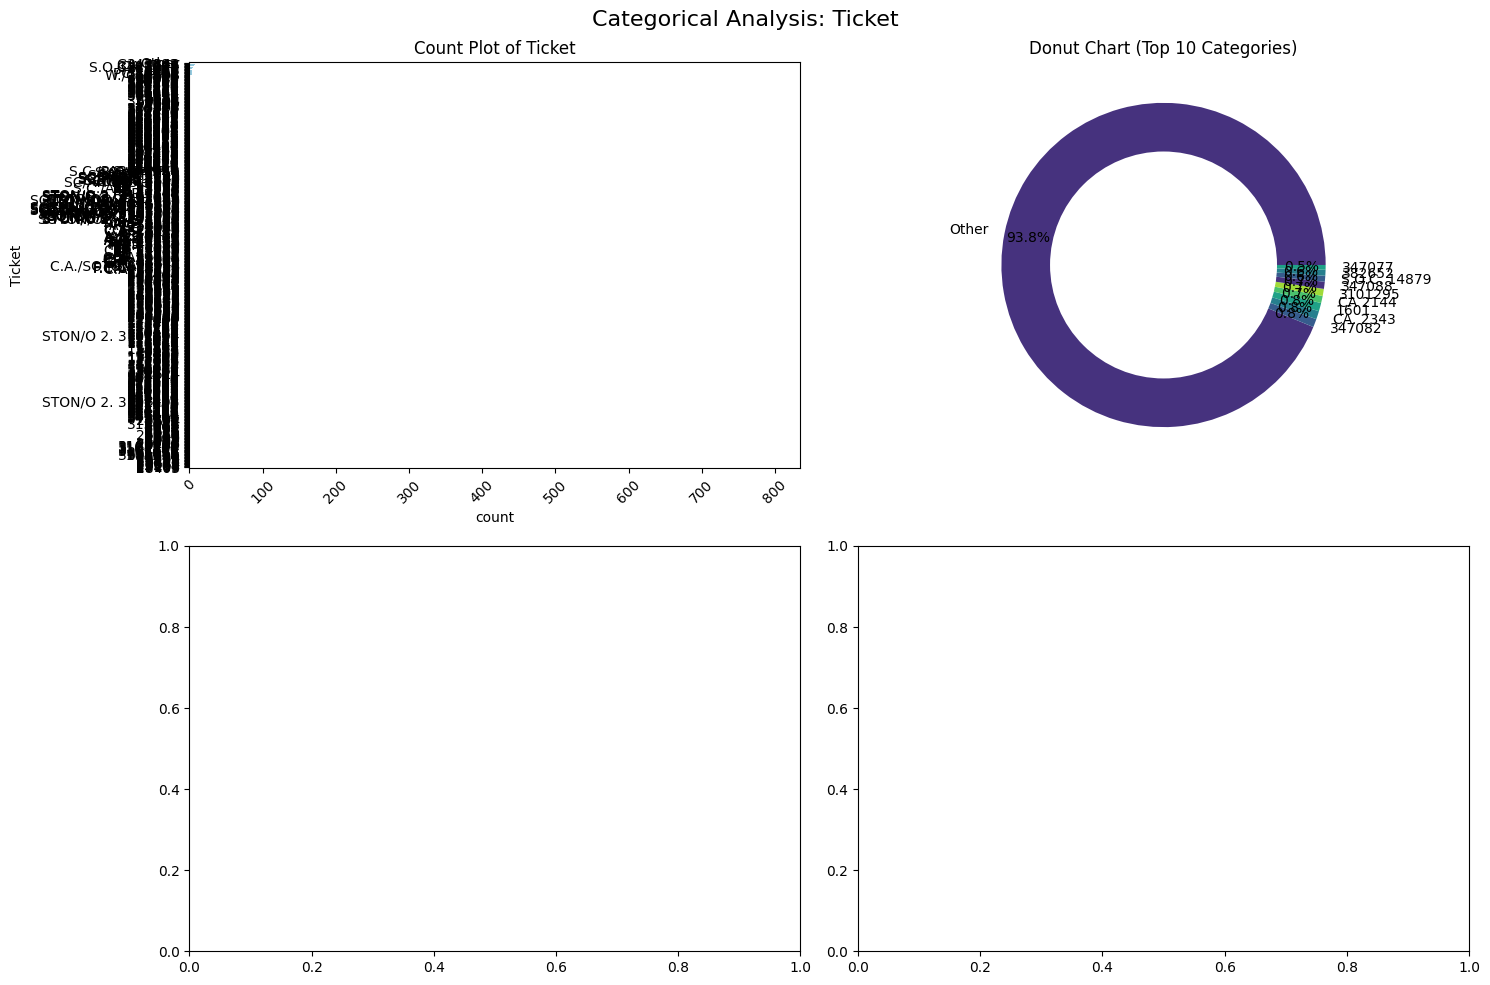


--------------------------------------------------

CATEGORICAL ANALYSIS FOR: Cabin

Summary Statistics:
- Missing values: 687 (77.1%)
- Unique values: 147

Top 20 Values (of 147):
Cabin
NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
C22 C26          3
D                3
E101             3
F2               3
B22              2
B77              2
B58 B60          2
B28              2
B35              2
B51 B53 B55      2
B5               2
B20              2
B18              2
C124             2
C52              2

Top Value Percentages:
Cabin
NaN            77.1%
C23 C25 C27     0.4%
B96 B98         0.4%
G6              0.4%
F33             0.3%
C22 C26         0.3%
D               0.3%
E101            0.3%
F2              0.3%
B22             0.2%
B77             0.2%
B58 B60         0.2%
B28             0.2%
B35             0.2%
B51 B53 B55     0.2%
B5              0.2%
B20             0.2%
B18             0.2%
C124            0.2%
C52

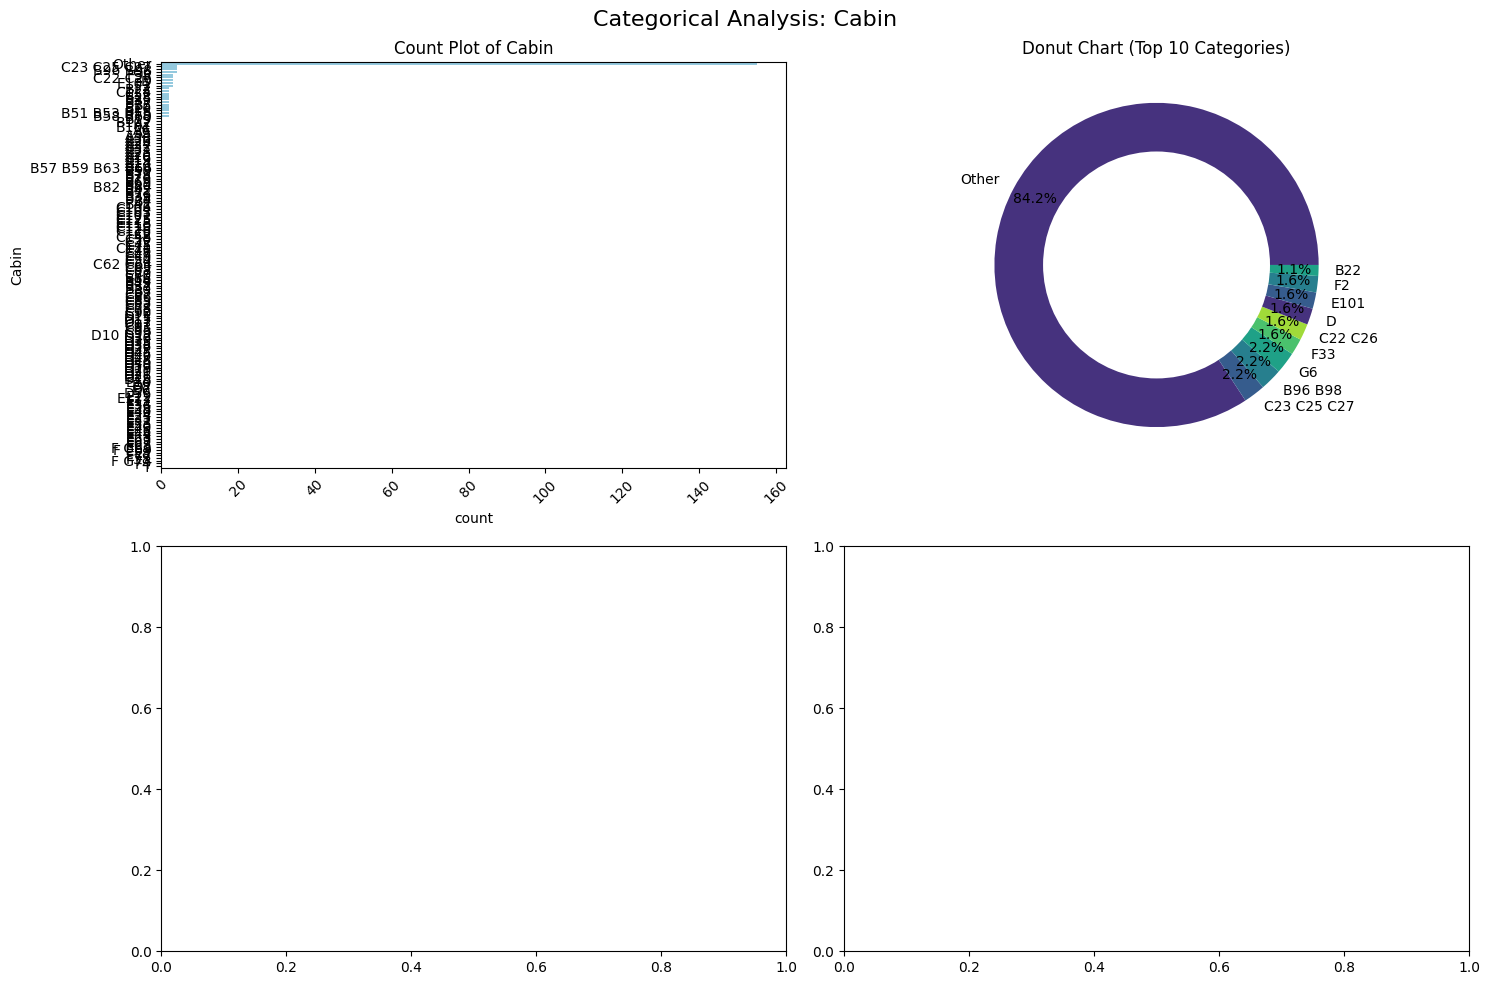


--------------------------------------------------

CATEGORICAL ANALYSIS FOR: Embarked

Summary Statistics:
- Missing values: 2 (0.2%)
- Unique values: 3

Value Counts:
Embarked
S      644
C      168
Q       77
NaN      2

Value Percentages:
Embarked
S      72.3%
C      18.9%
Q       8.6%
NaN     0.2%


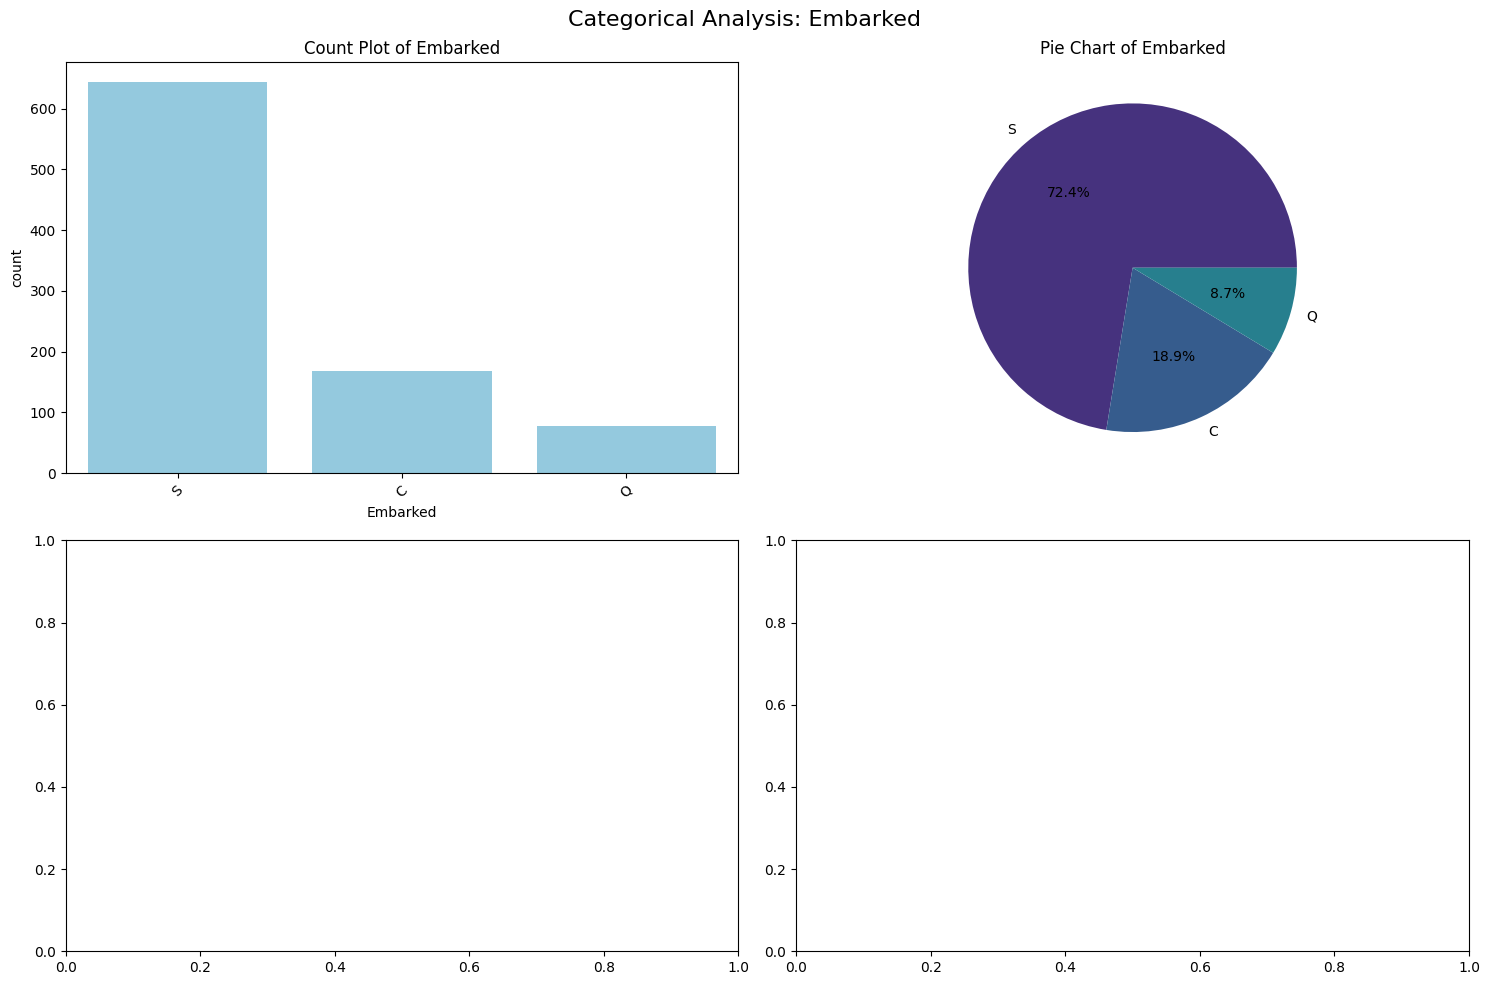


--------------------------------------------------


{'Name': {'count': 891,
  'missing': np.int64(0),
  'missing_pct': np.float64(0.0),
  'n_unique': 891,
  'value_counts': Name
  van Melkebeke, Mr. Philemon         1
  Abbing, Mr. Anthony                 1
  Abbott, Mr. Rossmore Edward         1
  Abbott, Mrs. Stanton (Rosa Hunt)    1
  Abelson, Mr. Samuel                 1
                                     ..
  Allen, Mr. William Henry            1
  Allen, Miss. Elisabeth Walton       1
  Ali, Mr. William                    1
  Ali, Mr. Ahmed                      1
  Alhomaki, Mr. Ilmari Rudolf         1
  Name: count, Length: 891, dtype: int64,
  'value_counts_pct': Name
  van Melkebeke, Mr. Philemon         0.001122
  Abbing, Mr. Anthony                 0.001122
  Abbott, Mr. Rossmore Edward         0.001122
  Abbott, Mrs. Stanton (Rosa Hunt)    0.001122
  Abelson, Mr. Samuel                 0.001122
                                        ...   
  Allen, Mr. William Henry            0.001122
  Allen, Miss. Elisabeth Walton     

In [9]:
def categorical_univariate_analysis(df, figsize=(15, 10), top_n=20,
                                  color='skyblue', palette='viridis'):
    """
    Perform univariate analysis on all categorical columns in a DataFrame
    with multiple visualization types.

    Parameters:
    - df: Pandas DataFrame
    - figsize: Tuple for figure size
    - top_n: Show top N categories (for high-cardinality features)
    - color: Color for single-color plots
    - palette: Color palette for multi-color plots

    Returns:
    - Dictionary containing summary statistics for each column
    """

    # Select categorical columns (object, category, bool types)
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    if len(categorical_cols) == 0:
        print("No categorical columns found in the DataFrame.")
        return None

    stats_results = {}

    for col in categorical_cols:
        print(f"\n{'='*50}")
        print(f"CATEGORICAL ANALYSIS FOR: {col}")
        print(f"{'='*50}")

        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle(f'Categorical Analysis: {col}', fontsize=16)

        # Data summary
        # Convert 'object' type columns to 'category' for better handling
        col_data = df[col].astype('category') if df[col].dtype == 'object' else df[col]
        value_counts = col_data.value_counts(dropna=False)
        value_counts_pct = col_data.value_counts(dropna=False, normalize=True)
        n_unique = col_data.nunique()
        n_missing = col_data.isna().sum()

        stats_results[col] = {
            'count': len(col_data),
            'missing': n_missing,
            'missing_pct': n_missing / len(col_data),
            'n_unique': n_unique,
            'value_counts': value_counts,
            'value_counts_pct': value_counts_pct
        }

        print(f"\nSummary Statistics:")
        print(f"- Missing values: {n_missing} ({n_missing/len(df):.1%})")
        print(f"- Unique values: {n_unique}")
        if n_unique <= 20:
            print("\nValue Counts:")
            print(value_counts.to_string())
            print("\nValue Percentages:")
            print(value_counts_pct.apply(lambda x: f"{x:.1%}").to_string())
        else:
            print(f"\nTop {top_n} Values (of {n_unique}):")
            print(value_counts.head(top_n).to_string())
            print("\nTop Value Percentages:")
            print(value_counts_pct.head(top_n).apply(lambda x: f"{x:.1%}").to_string())

        # Handle high cardinality (show only top_n categories)
        plot_data = col_data.copy()
        if n_unique > top_n:
            top_categories = value_counts.index[:top_n].tolist() # Get top categories as a list
            # Add 'Other' to categories *before* using .where()
            if 'Other' not in plot_data.cat.categories:
                 plot_data = plot_data.cat.add_categories('Other')
            plot_data = plot_data.where(plot_data.isin(top_categories), 'Other')


        # Count Plot (Bar plot)
        if n_unique > 15:
            # Horizontal for many categories
            sns.countplot(y=plot_data, order=plot_data.value_counts().index,
                         color=color, ax=axes[0, 0])
        else:
            sns.countplot(x=plot_data, order=plot_data.value_counts().index,
                         color=color, ax=axes[0, 0])
        axes[0, 0].set_title(f'Count Plot of {col}')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Pie Chart (only if reasonable number of categories)
        if n_unique <= 10 and n_unique > 1:
            plot_data.value_counts().plot.pie(autopct='%1.1f%%',
                                            colors=sns.color_palette(palette),
                                            ax=axes[0, 1])
            axes[0, 1].set_ylabel('')  # Remove y-label
            axes[0, 1].set_title(f'Pie Chart of {col}')
        else:
            # If too many categories, show donut chart of top N
            top_data = plot_data.value_counts().head(10)
            axes[0, 1].pie(top_data, labels=top_data.index,
                          autopct='%1.1f%%', pctdistance=0.85,
                          colors=sns.color_palette(palette))
            centre_circle = plt.Circle((0,0), 0.70, fc='white')
            axes[0, 1].add_artist(centre_circle)
            axes[0, 1].set_title(f'Donut Chart (Top {len(top_data)} Categories)')


        plt.tight_layout()
        plt.show()
        print("\n" + "-"*50)

    return stats_results
# Run the analysis
categorical_univariate_analysis(train_df)

**Univariate Numerical Columns Analysis**


UNIVARIATE ANALYSIS FOR: PassengerId

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 446.00
- Median: 446.00
- Range: 1.00 to 891.00


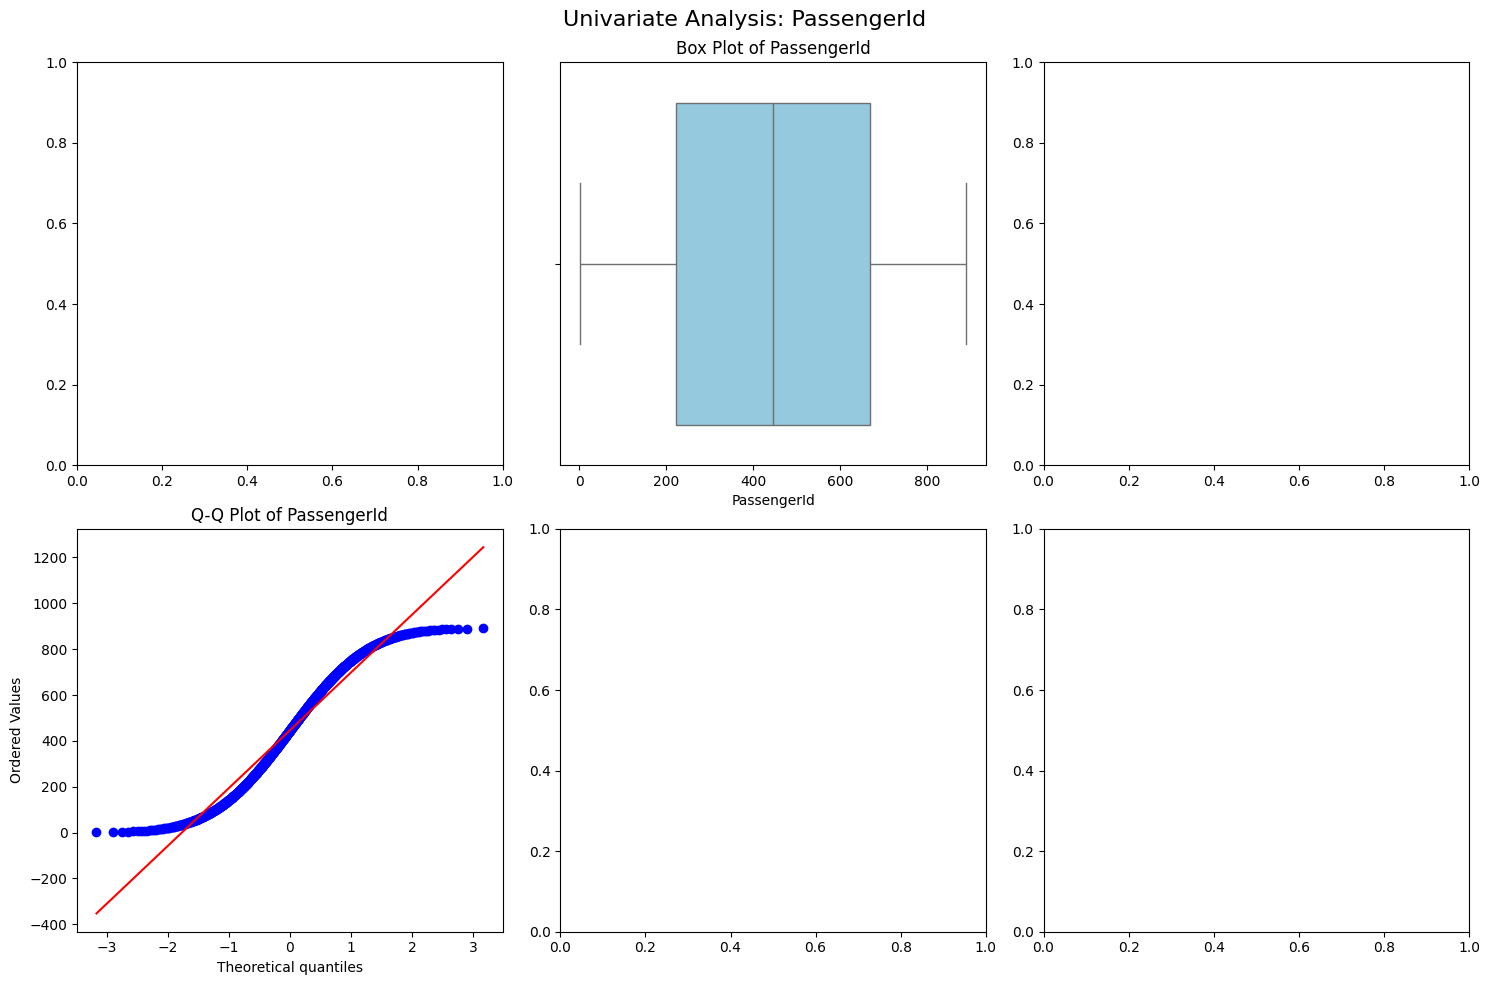


UNIVARIATE ANALYSIS FOR: Survived

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 0.38
- Median: 0.00
- Range: 0.00 to 1.00


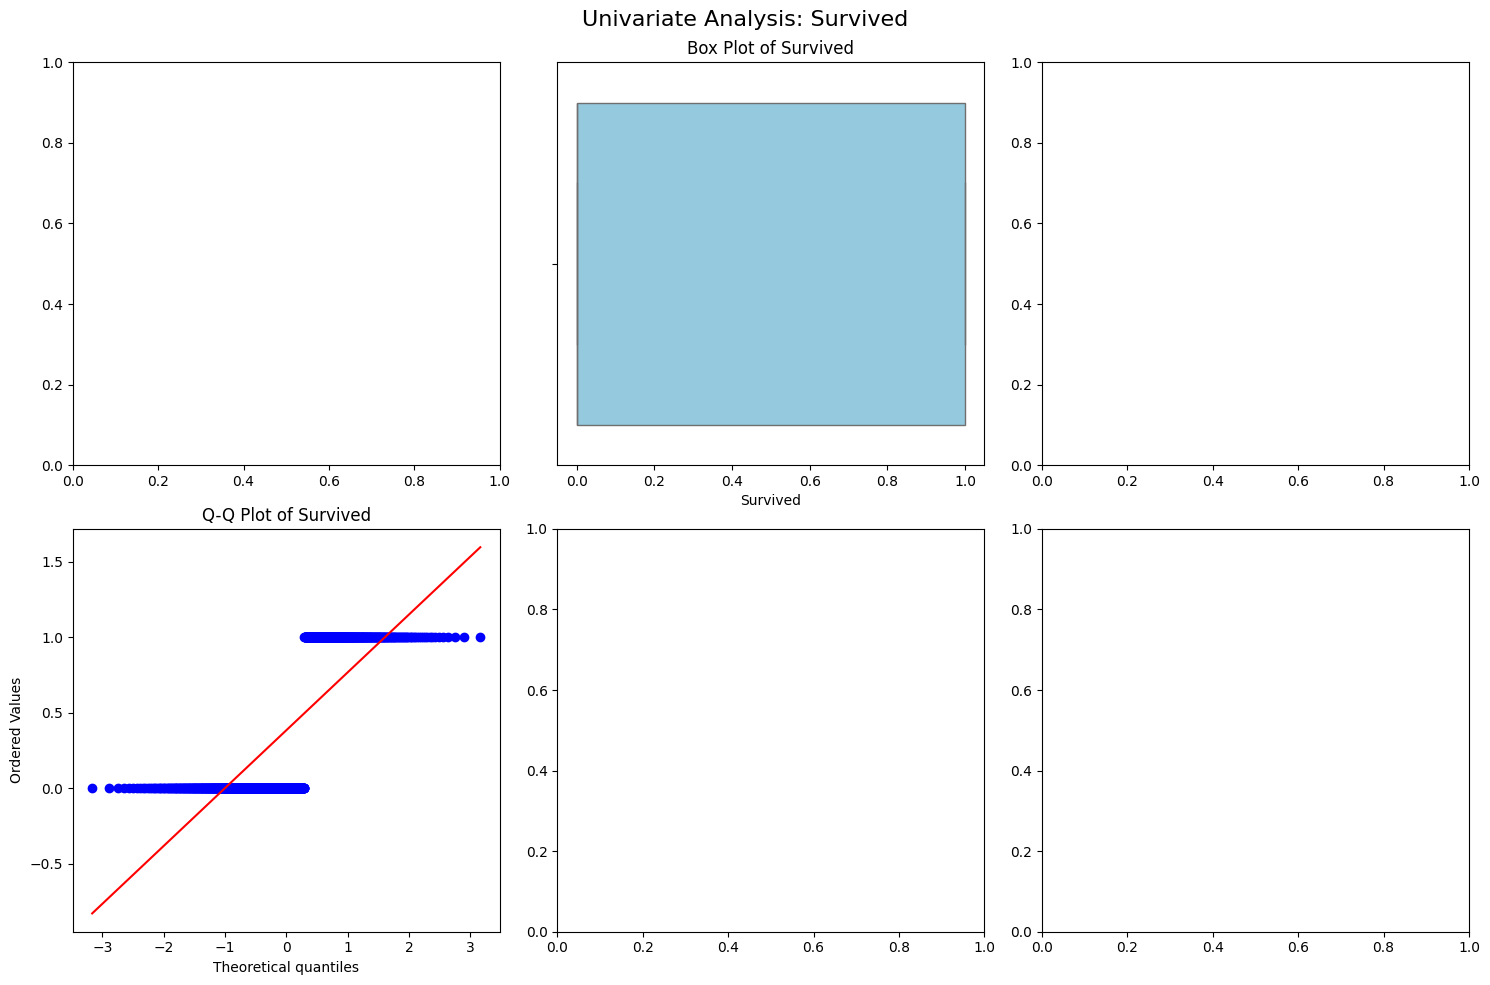


UNIVARIATE ANALYSIS FOR: Pclass

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 2.31
- Median: 3.00
- Range: 1.00 to 3.00


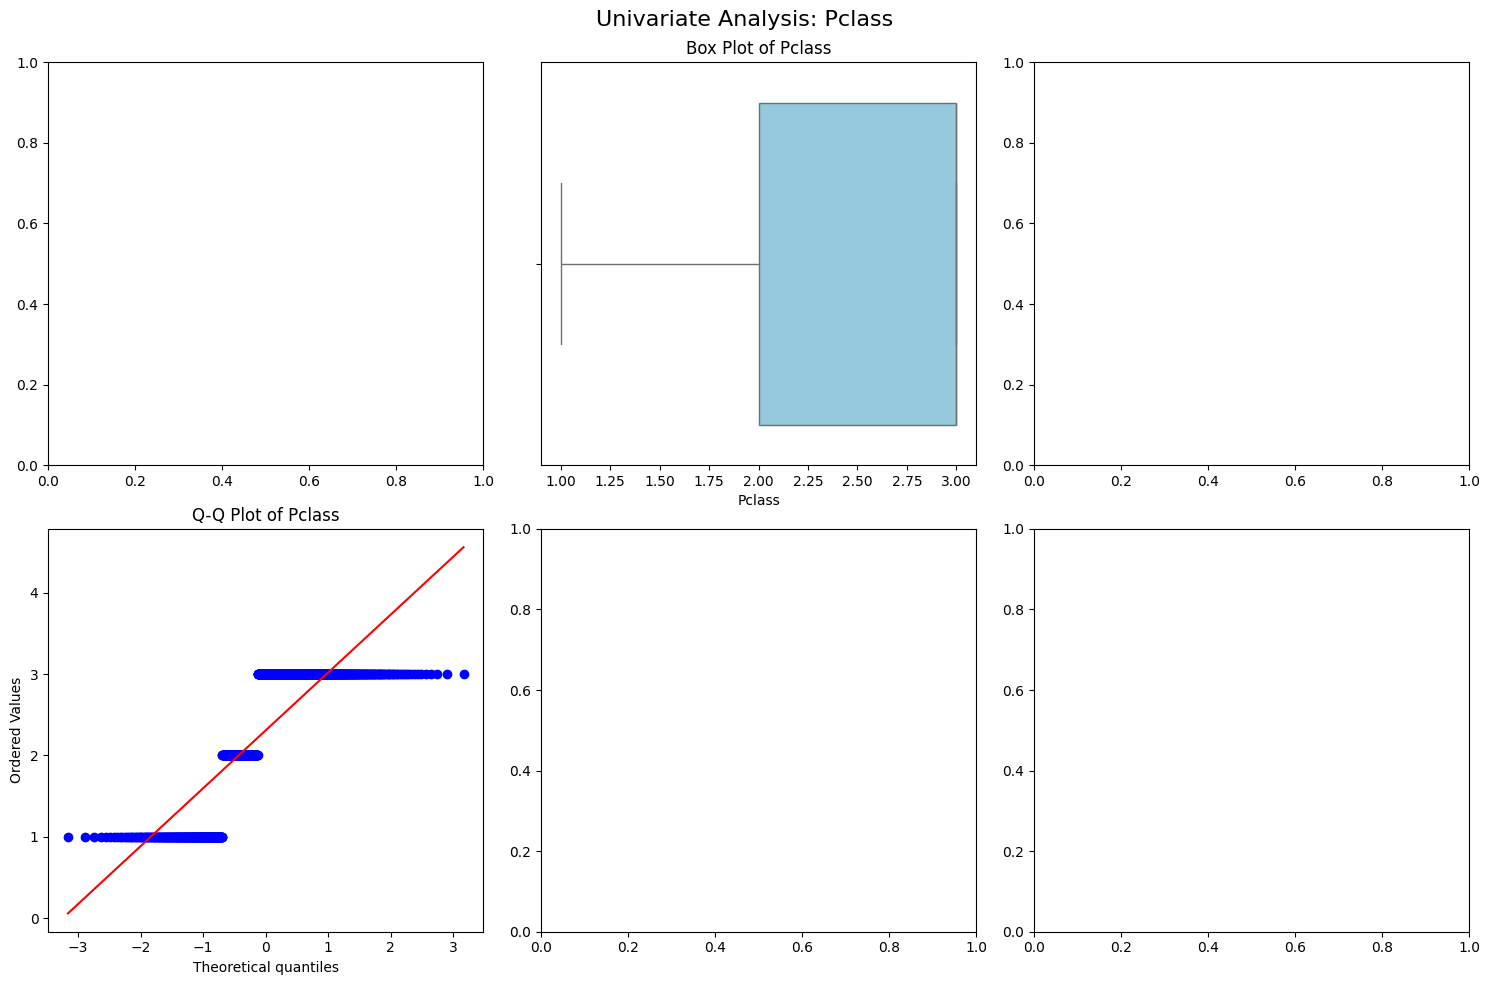


UNIVARIATE ANALYSIS FOR: Age

Summary Statistics:
- Missing values: 177 (19.9%)
- Mean: 29.70
- Median: 28.00
- Range: 0.42 to 80.00


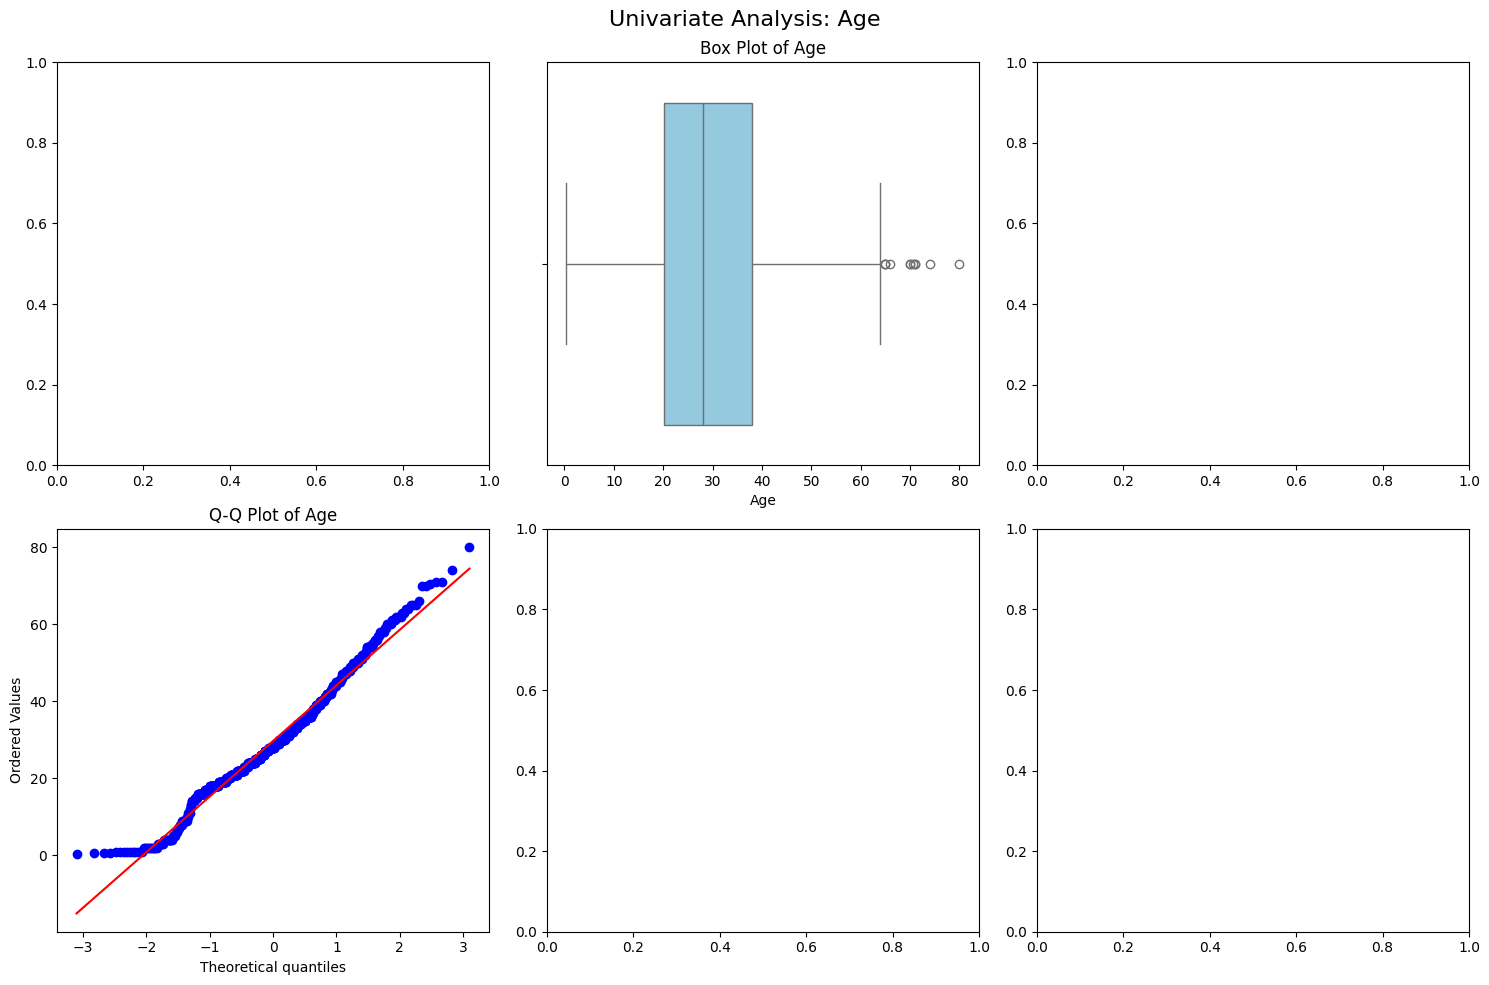


UNIVARIATE ANALYSIS FOR: SibSp

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 0.52
- Median: 0.00
- Range: 0.00 to 8.00


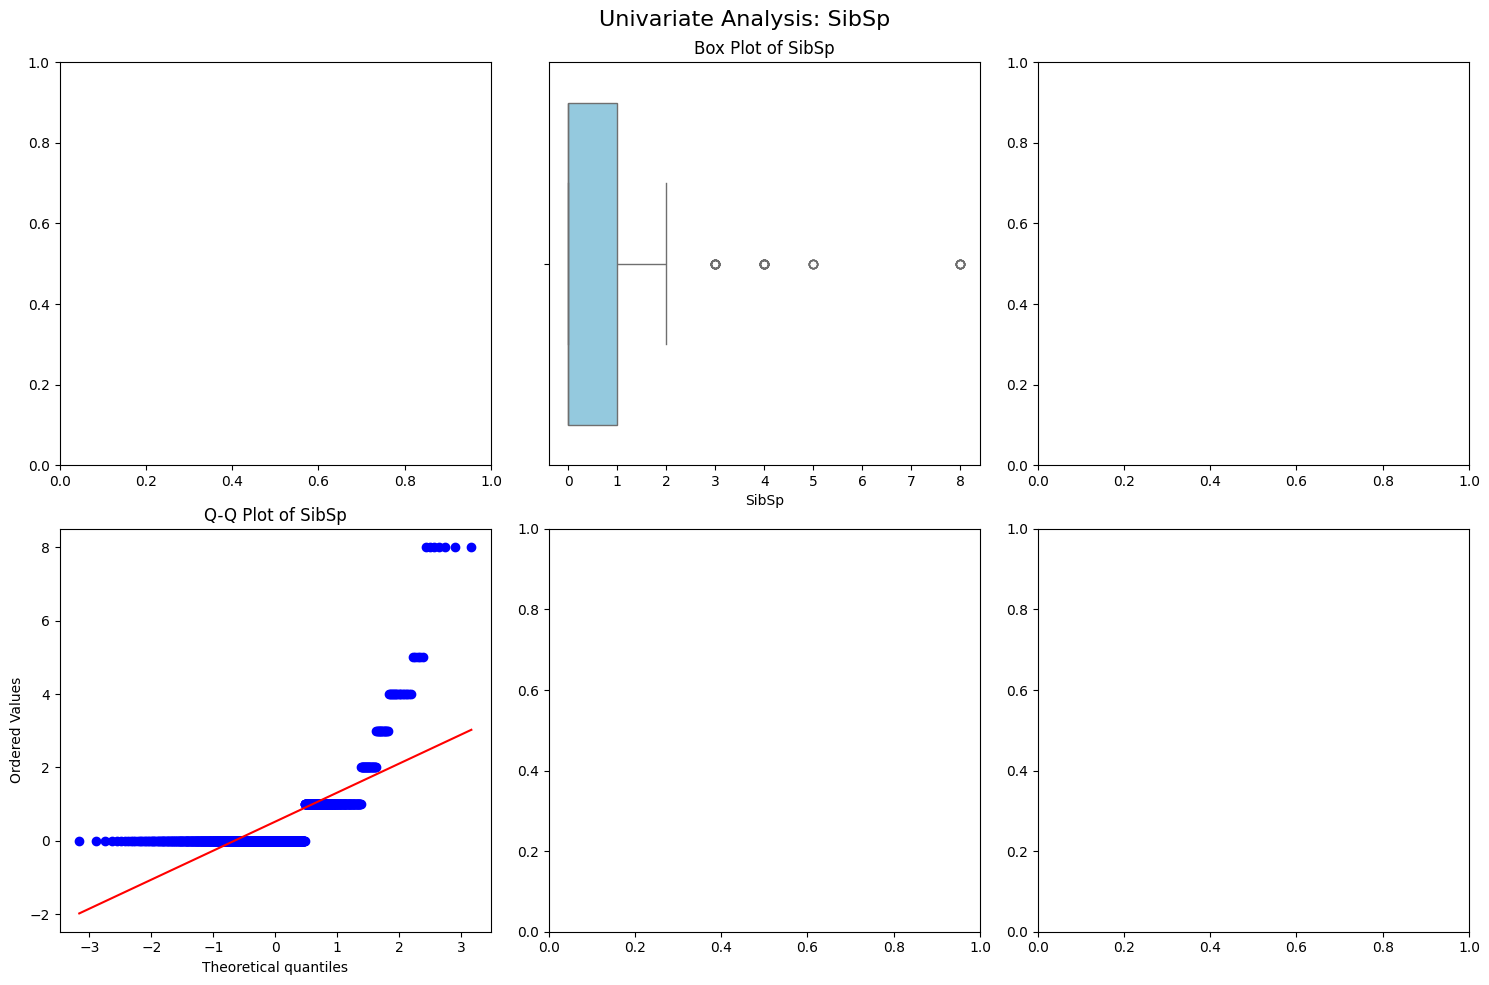


UNIVARIATE ANALYSIS FOR: Parch

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 0.38
- Median: 0.00
- Range: 0.00 to 6.00


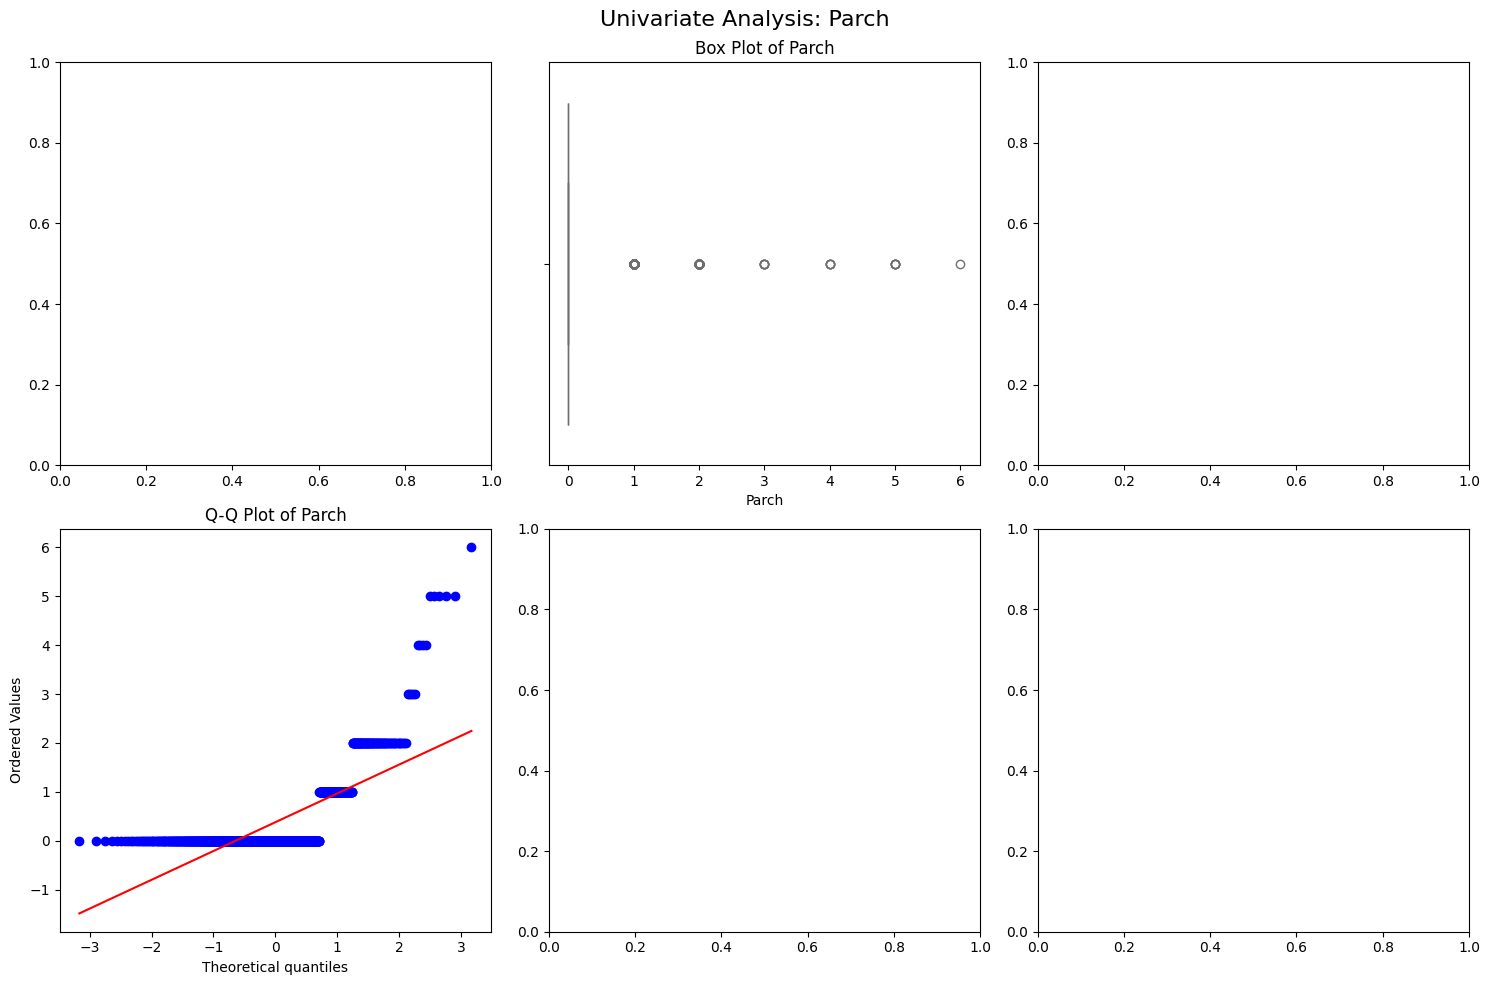


UNIVARIATE ANALYSIS FOR: Fare

Summary Statistics:
- Missing values: 0 (0.0%)
- Mean: 32.20
- Median: 14.45
- Range: 0.00 to 512.33


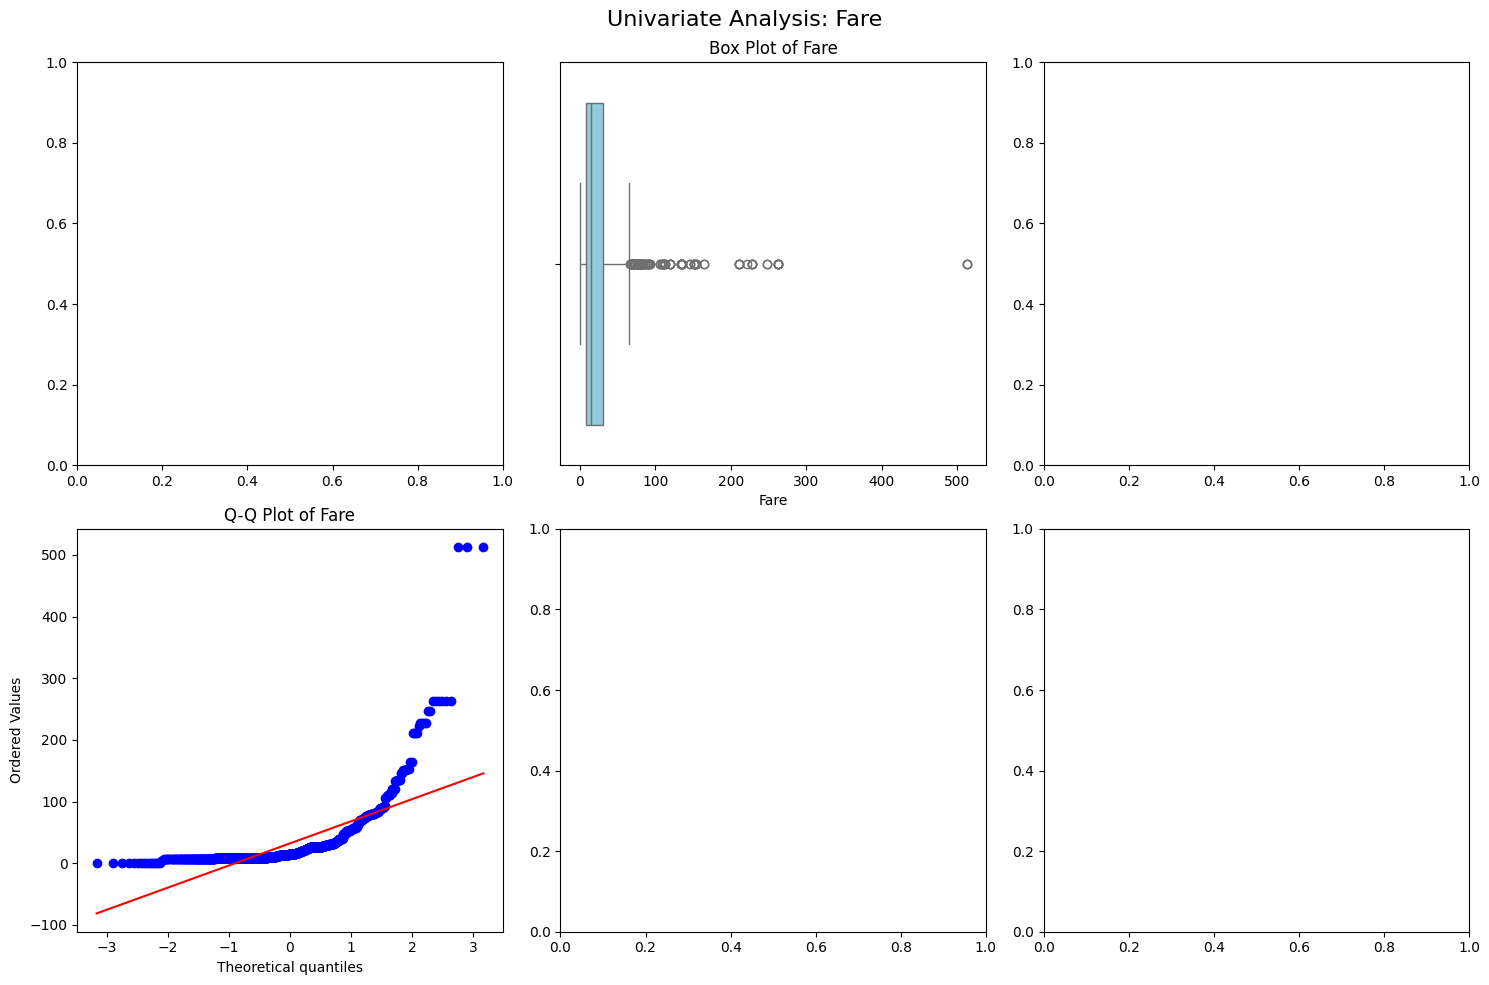

{'PassengerId': {'count': 891,
  'missing': np.int64(0),
  'mean': np.float64(446.0),
  'median': 446.0,
  'min': 1,
  'max': 891,
  'std': 257.3538420152301,
  'skew': np.float64(0.0),
  'kurtosis': np.float64(-1.1999999999999997)},
 'Survived': {'count': 891,
  'missing': np.int64(0),
  'mean': np.float64(0.3838383838383838),
  'median': 0.0,
  'min': 0,
  'max': 1,
  'std': 0.4865924542648585,
  'skew': np.float64(0.4785234382949897),
  'kurtosis': np.float64(-1.775004671066304)},
 'Pclass': {'count': 891,
  'missing': np.int64(0),
  'mean': np.float64(2.308641975308642),
  'median': 3.0,
  'min': 1,
  'max': 3,
  'std': 0.8360712409770513,
  'skew': np.float64(-0.6305479068752845),
  'kurtosis': np.float64(-1.2800149715782825)},
 'Age': {'count': 714,
  'missing': np.int64(177),
  'mean': np.float64(29.69911764705882),
  'median': 28.0,
  'min': 0.42,
  'max': 80.0,
  'std': 14.526497332334044,
  'skew': np.float64(0.38910778230082693),
  'kurtosis': np.float64(0.1782741536421022)}

In [10]:
def numerical_cols_analysis(df, figsize=(15, 10), bins=30, color='skyblue'):
    """
    Perform univariate analysis on all numerical columns in a DataFrame
    with multiple visualization types.

    Parameters:
    - df: Pandas DataFrame
    - figsize: Tuple for figure size
    - bins: Number of bins for histograms
    - color: Color for plots

    Returns:
    - Dictionary containing skewness and kurtosis for each column
    """

    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns

    if len(numerical_cols) == 0:
        print("No numerical columns found in the DataFrame.")
        return None

    stats_results = {}

    for col in numerical_cols:
        print(f"\n{'='*50}")
        print(f"UNIVARIATE ANALYSIS FOR: {col}")
        print(f"{'='*50}")

        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle(f'Univariate Analysis: {col}', fontsize=16)

        # Data summary
        col_data = df[col].dropna()
        n_missing = df[col].isna().sum()
        stats_results[col] = {
            'count': len(col_data),
            'missing': n_missing,
            'mean': col_data.mean(),
            'median': col_data.median(),
            'min': col_data.min(),
            'max': col_data.max(),
            'std': col_data.std(),
            'skew': col_data.skew(),
            'kurtosis': col_data.kurtosis()
        }

        print(f"\nSummary Statistics:")
        print(f"- Missing values: {n_missing} ({n_missing/len(df):.1%})")
        print(f"- Mean: {stats_results[col]['mean']:.2f}")
        print(f"- Median: {stats_results[col]['median']:.2f}")
        print(f"- Range: {stats_results[col]['min']:.2f} to {stats_results[col]['max']:.2f}")

        # Box plot
        sns.boxplot(x=df[col], color=color, ax=axes[0, 1])
        axes[0, 1].set_title(f'Box Plot of {col}')

        # Q-Q plot
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title(f'Q-Q Plot of {col}')

        plt.tight_layout()
        plt.show()

    return stats_results
    # Run the analysis
numerical_cols_analysis(train_df)

**Handling Missing Values**

<ipython-input-11-3649367263>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette='viridis')


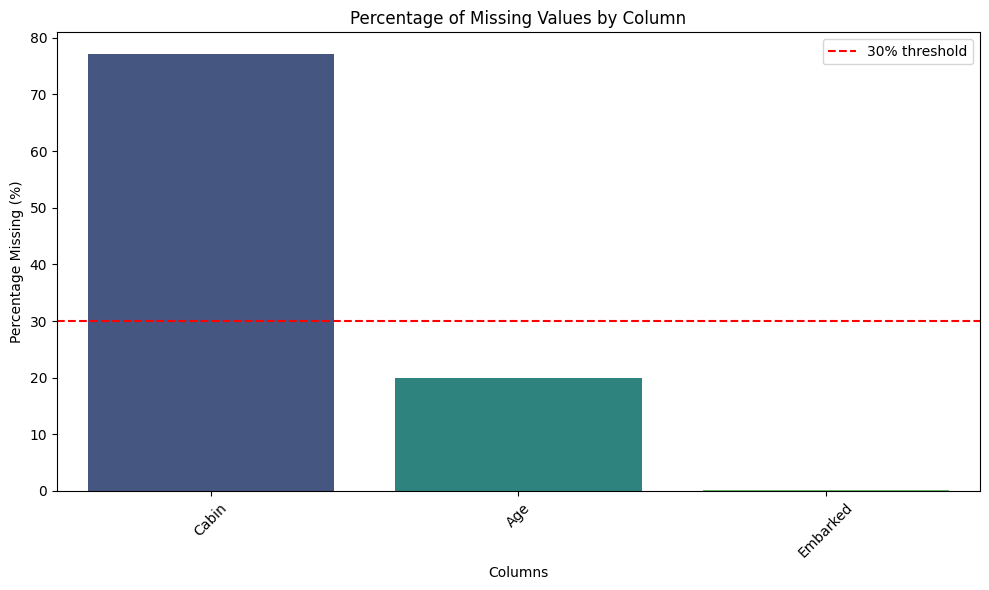

<ipython-input-11-3649367263>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)
<ipython-input-11-3649367263>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Total missing values before handling: 866
Total missing values after imputation: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
def handle_missing_values(df, impute=True, categorical_strategy='most_frequent', numerical_strategy='mean'):
    """
    Analyze and handle missing values in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - impute: bool, whether to impute missing values (default True)
    - categorical_strategy: strategy for categorical imputation ('most_frequent', 'constant')
    - numerical_strategy: strategy for numerical imputation ('mean', 'median', 'mode')

    Returns:
    - DataFrame with missing values imputed (if impute=True)
    - Displays a bar plot of missing value percentages
    """

    # Calculate missing value percentages
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

    # Plot missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percent.index, y=missing_percent.values, palette='viridis')
    plt.axhline(y=30, color='red', linestyle='--', label='30% threshold')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Percentage Missing (%)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Total missing values before handling: {df.isnull().sum().sum()}")

    if not impute:
        return df

    # Make a copy of the original dataframe
    df_imputed = df.copy()

    # Separate categorical and numerical columns
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

    # Impute categorical columns
    for col in categorical_cols:
        if df_imputed[col].isnull().any():
            if categorical_strategy == 'most_frequent':
                df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)
            elif categorical_strategy == 'constant':
                df_imputed[col].fillna('Missing', inplace=True)

    # Impute numerical columns
    for col in numerical_cols:
        if df_imputed[col].isnull().any():
            if numerical_strategy == 'mean':
                df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)
            elif numerical_strategy == 'median':
                df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            elif numerical_strategy == 'mode':
                df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)

    print(f"Total missing values after imputation: {df_imputed.isnull().sum().sum()}")

    return df_imputed
# Example usage:
handle_missing_values(train_df)

**Outliers Removals**

In [12]:
def outliers_iqr(
    data: pd.DataFrame,
    columns: list = None,
    threshold: float = 1.5,
    show_summary: bool = False
) -> pd.DataFrame:
    """
    Remove only extreme outliers from a DataFrame using the IQR method.

    Parameters:
    - data: Input DataFrame
    - columns: List of columns to process (None for all numeric columns)
    - threshold: IQR multiplier for extreme outlier detection (default: 3.0)
    - show_summary: If True, prints number of rows removed

    Returns:
    - Cleaned DataFrame with extreme outliers removed
    """
    if not isinstance(data, pd.DataFrame) or data.empty:
        raise ValueError("Input must be a non-empty DataFrame")

    df = data.copy()
    if columns is None:
        columns = df.select_dtypes(include=np.number).columns.tolist()

    rows_to_remove = set()

    for col in columns:
        if col not in df.columns:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        rows_to_remove.update(outliers.index)

    cleaned_df = df.drop(index=list(rows_to_remove))

    if show_summary:
        print(f"Removed {len(rows_to_remove)} extreme outliers")
        print(f"Original shape: {df.shape}, New shape: {cleaned_df.shape}")

    return cleaned_df
# Usage
train_df = outliers_iqr(train_df, show_summary=True)

Removed 293 extreme outliers
Original shape: (891, 12), New shape: (598, 12)


**Feature Engineering**

In [13]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.484211
1,2,0.373016
2,3,0.225464


In [14]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.721088
1,male,0.159645


In [15]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.273279
1,1,0.430108
2,2,0.272727


In [16]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.297659


In [17]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [18]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.273279
1,2,0.430108
2,3,0.272727


In [19]:
def group_family_size(size):
    if size == 1:
        return 'Alone'
    elif size in [2, 3, 4]:
        return 'Small'
    elif size in [5, 6]:
        return 'Medium'
    elif size >= 7:
        return 'Large'
    else:
        return 'Unknown'

train_df['Family_Size_Grouped'] = train_df['Family_Size'].apply(group_family_size)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].apply(group_family_size)

In [20]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.273279
1,Small,0.413462


In [21]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.385542
1,Q,0.446154
2,S,0.260000


<ipython-input-22-2524054410>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(


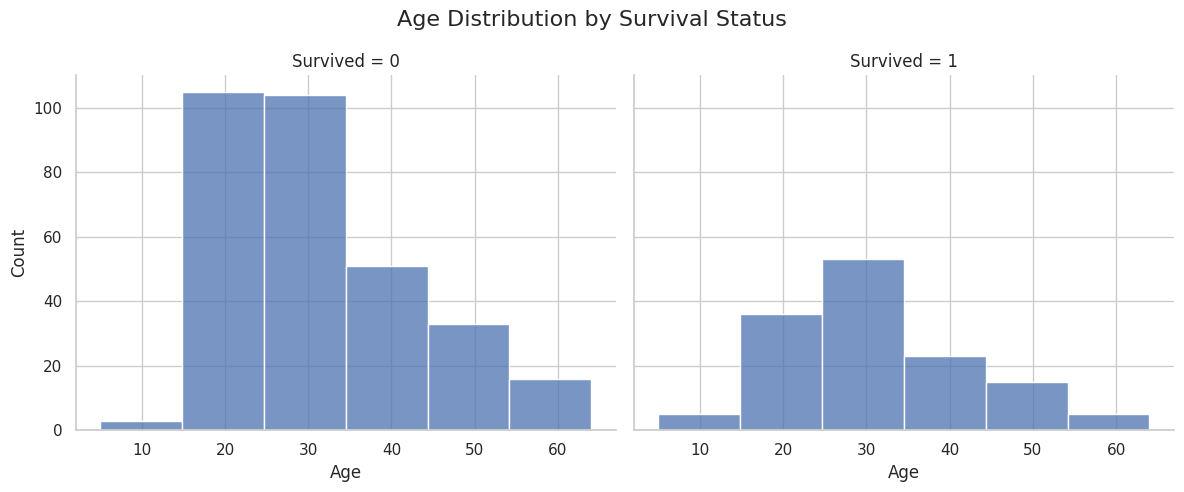

In [22]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Improved displot with different colors for each 'Survived' column
sns.displot(
    data=train_df,
    x='Age',
    col='Survived',
    binwidth=10,
    height=5,
    aspect=1.2,
    color=None,  # We’ll control it via palette
    palette={0: '#FF6F61', 1: '#6B8E23'}  # Red-ish for non-survivors, green-ish for survivors
)

# Optional: Add axis titles
plt.subplots_adjust(top=0.85)
plt.suptitle("Age Distribution by Survival Status", fontsize=16)

plt.show()

In [23]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 5)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 5)

In [24]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

<ipython-input-24-1587675067>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(4.999, 21.0]",0.292929
1,"(21.0, 26.0]",0.240964
2,"(26.0, 32.0]",0.386139
3,"(32.0, 40.7]",0.289474
4,"(40.7, 64.0]",0.300000


In [25]:
age_bins = [-float('inf'), 19, 25, 31.8, 41, 80, float('inf')]
age_labels = [0, 1, 2, 3, 4, 4] # Contains duplicate label 4

for df in [train_df, test_df]:
    # Set ordered=False to allow non-unique labels
    df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, ordered=False)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(21.0, 26.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(21.0, 26.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S,2,Small,"(32.0, 40.7]"
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S,1,Alone,"(32.0, 40.7]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Alone,NaN


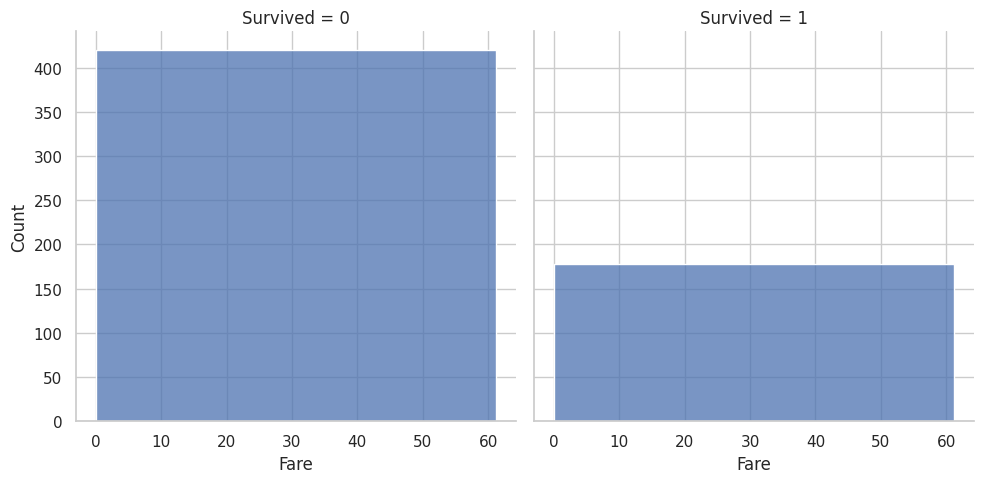

In [27]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [28]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 5)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 5)

In [29]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

<ipython-input-29-1994933730>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.75]",0.214815
1,"(7.75, 8.05]",0.197183
2,"(8.05, 12.375]",0.256098
3,"(12.375, 25.928]",0.319328
4,"(25.928, 61.175]",0.516667


In [30]:
def bin_fare(df):
    df.loc[df['Fare'] <= 7.854, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.854) & (df['Fare'] <= 10.5), 'Fare'] = 1
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'Fare'] = 2
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'Fare'] = 3
    df.loc[(df['Fare'] > 39.688), 'Fare'] = 4  # Combined last two cases since they both =4
    return df

train_df = bin_fare(train_df)
test_df = bin_fare(test_df)

In [31]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
...,...
884,"Sutehall, Mr. Henry Jr"
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
889,"Behr, Mr. Karl Howell"


In [32]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [33]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Col,0.500000
1,Don,0.000000
2,Dr,0.400000
3,Jonkheer,0.000000
4,Lady,1.000000
5,Major,0.500000
6,Master,1.000000
7,Miss,0.666667
8,Mlle,1.000000
9,Mr,0.154378


In [34]:
# Define title mapping once (DRY principle)
title_mapping = {
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
}

# Apply to both DataFrames efficiently
train_df['Title'] = train_df['Title'].replace(title_mapping)
test_df['Title'] = test_df['Title'].replace(title_mapping)

In [35]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,5,0.400000
1,Master,1,1.000000
2,Military,4,0.500000
3,Miss,93,0.666667
4,Mr,434,0.154378
5,Mrs,50,0.800000
6,Noble,6,0.666667
7,Rev,5,0.000000


In [36]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

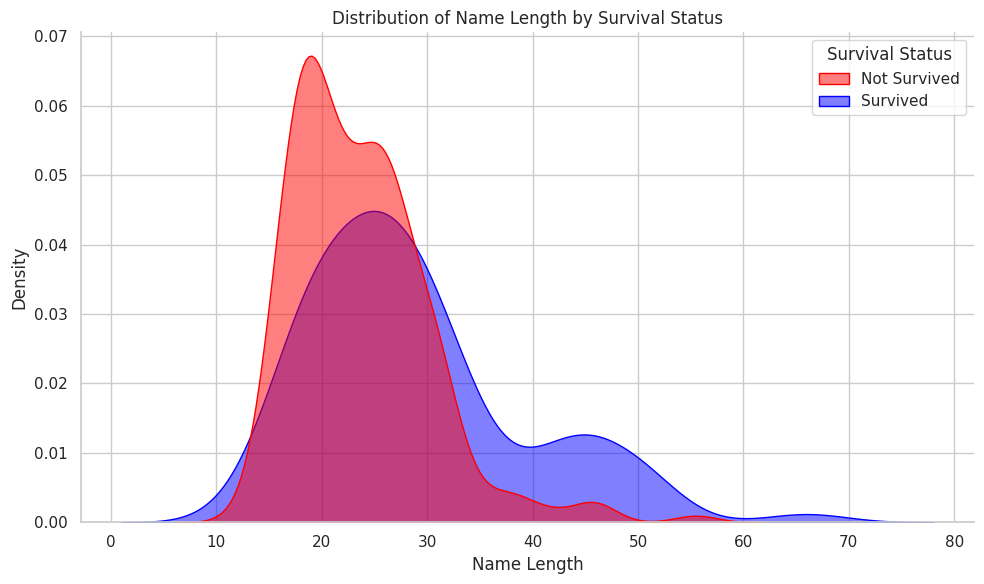

In [37]:
# Create a cleaner and more efficient KDE plot
plt.figure(figsize=(10, 6))
g = sns.kdeplot(
    data=train_df,
    x='Name_Length',
    hue='Survived',
    palette={0: 'red', 1: 'blue'},
    fill=True,
    common_norm=False,  # Shows actual density for each group
    alpha=0.5  # Adds transparency for better visibility
)

# Improve plot aesthetics
g.set(
    xlabel='Name Length',
    ylabel='Density',
    title='Distribution of Name Length by Survival Status'
)
g.legend_.set_title('Survival Status')
g.legend_.get_texts()[0].set_text('Not Survived')
g.legend_.get_texts()[1].set_text('Survived')

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

In [38]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 3)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 3)

In [39]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

<ipython-input-39-554738133>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 20.0]",0.195000
1,"(20.0, 27.0]",0.264840
2,"(27.0, 67.0]",0.452514


In [40]:
# Define bins and labels
name_bins = [-float('inf'), 22, 28, 82, float('inf')]
name_labels = [0, 1, 2, 2]  # Both >28 and >82 get label 2

# Function to bin name lengths
def bin_name_length(df):
    df['Name_Size'] = pd.cut(
        df['Name_Length'],
        bins=name_bins,
        labels=name_labels,
        right=True,
        ordered=False
    ).astype(int)
    return df

# Apply to both dataframes
train_df = bin_name_length(train_df)
test_df = bin_name_length(test_df)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0.0,NaN,S,2,Small,"(21.0, 26.0]","(-0.001, 7.75]",Mr,23,"(20.0, 27.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(21.0, 26.0]","(7.75, 8.05]",Miss,22,"(20.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,4.0,C123,S,2,Small,"(32.0, 40.7]","(25.928, 61.175]",Mrs,44,"(27.0, 67.0]",2
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1.0,NaN,S,1,Alone,"(32.0, 40.7]","(7.75, 8.05]",Mr,24,"(20.0, 27.0]",1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1.0,NaN,Q,1,Alone,NaN,"(8.05, 12.375]",Mr,16,"(11.999, 20.0]",0


In [42]:
train_df['Ticket']

,Ticket
0,A/5 21171
2,STON/O2. 3101282
3,113803
4,373450
5,330877
...,...
884,SOTON/OQ 392076
886,211536
887,112053
889,111369


In [43]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [44]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
71,1601,7,0.714286
544,LINE,4,0.250000
81,17474,3,1.000000
481,371110,3,0.333333
147,239853,3,0.000000
...,...,...,...
195,2664,1,0.000000
197,2667,1,1.000000
198,2669,1,0.000000
199,26707,1,0.000000


In [45]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
2,1
3,2
4,1
5,1
...,...
884,1
886,1
887,1
889,1


In [46]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [47]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,502,0.274900
1,2,76,0.394737
2,3,9,0.444444
4,7,7,0.714286
3,4,4,0.250000


In [48]:
train_df['Ticket']

,Ticket
0,A/5 21171
2,STON/O2. 3101282
3,113803
4,373450
5,330877
...,...
884,SOTON/OQ 392076
886,211536
887,112053
889,111369


In [49]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
5,330877,None,None
...,...,...,...
884,SOTON/OQ,392076,None
886,211536,None,None
887,112053,None,None
889,111369,None,None


In [50]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [51]:
train_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,469
PC,16
STON/O,12
C.A.,11
A/5,10
SOTON/O.Q.,8
SOTON/OQ,7
A/5.,6
STON/O2.,6


In [52]:
# Define standardization mapping once (DRY principle)
ticket_mapping = {
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
}

# Create reusable function for standardization
def standardize_ticket_location(df):
    df['TicketLocation'] = df['TicketLocation'].replace(ticket_mapping)
    return df

# Apply to both DataFrames
train_df = standardize_ticket_location(train_df)
test_df = standardize_ticket_location(test_df)

In [53]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,20,0.100000
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,469,0.294243
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,12,0.416667
8,F.C.,1,0.000000
9,F.C.C.,2,1.000000


In [54]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [55]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,9,0.777778
1,B,6,0.333333
2,C,15,0.533333
3,D,10,0.200000
4,E,14,0.142857
5,F,4,0.250000
6,T,1,1.000000
7,U,340,0.302941


In [56]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [57]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,340,0.302941
1,1,258,0.290698


**Featured Data Overview**

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0.0,...,"(21.0, 26.0]","(-0.001, 7.75]",Mr,23,"(20.0, 27.0]",1,21171,1,A/5,0
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1.0,...,"(21.0, 26.0]","(7.75, 8.05]",Miss,22,"(20.0, 27.0]",0,3101282,1,STON/O2.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,4.0,...,"(32.0, 40.7]","(25.928, 61.175]",Mrs,44,"(27.0, 67.0]",2,113803,2,Blank,0
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1.0,...,"(32.0, 40.7]","(7.75, 8.05]",Mr,24,"(20.0, 27.0]",1,373450,1,Blank,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1.0,...,NaN,"(8.05, 12.375]",Mr,16,"(11.999, 20.0]",0,330877,1,Blank,1


In [59]:
train_df.shape

(598, 24)

In [60]:
test_df.shape

(418, 23)

In [61]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    category
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

**Correlation Analysis**

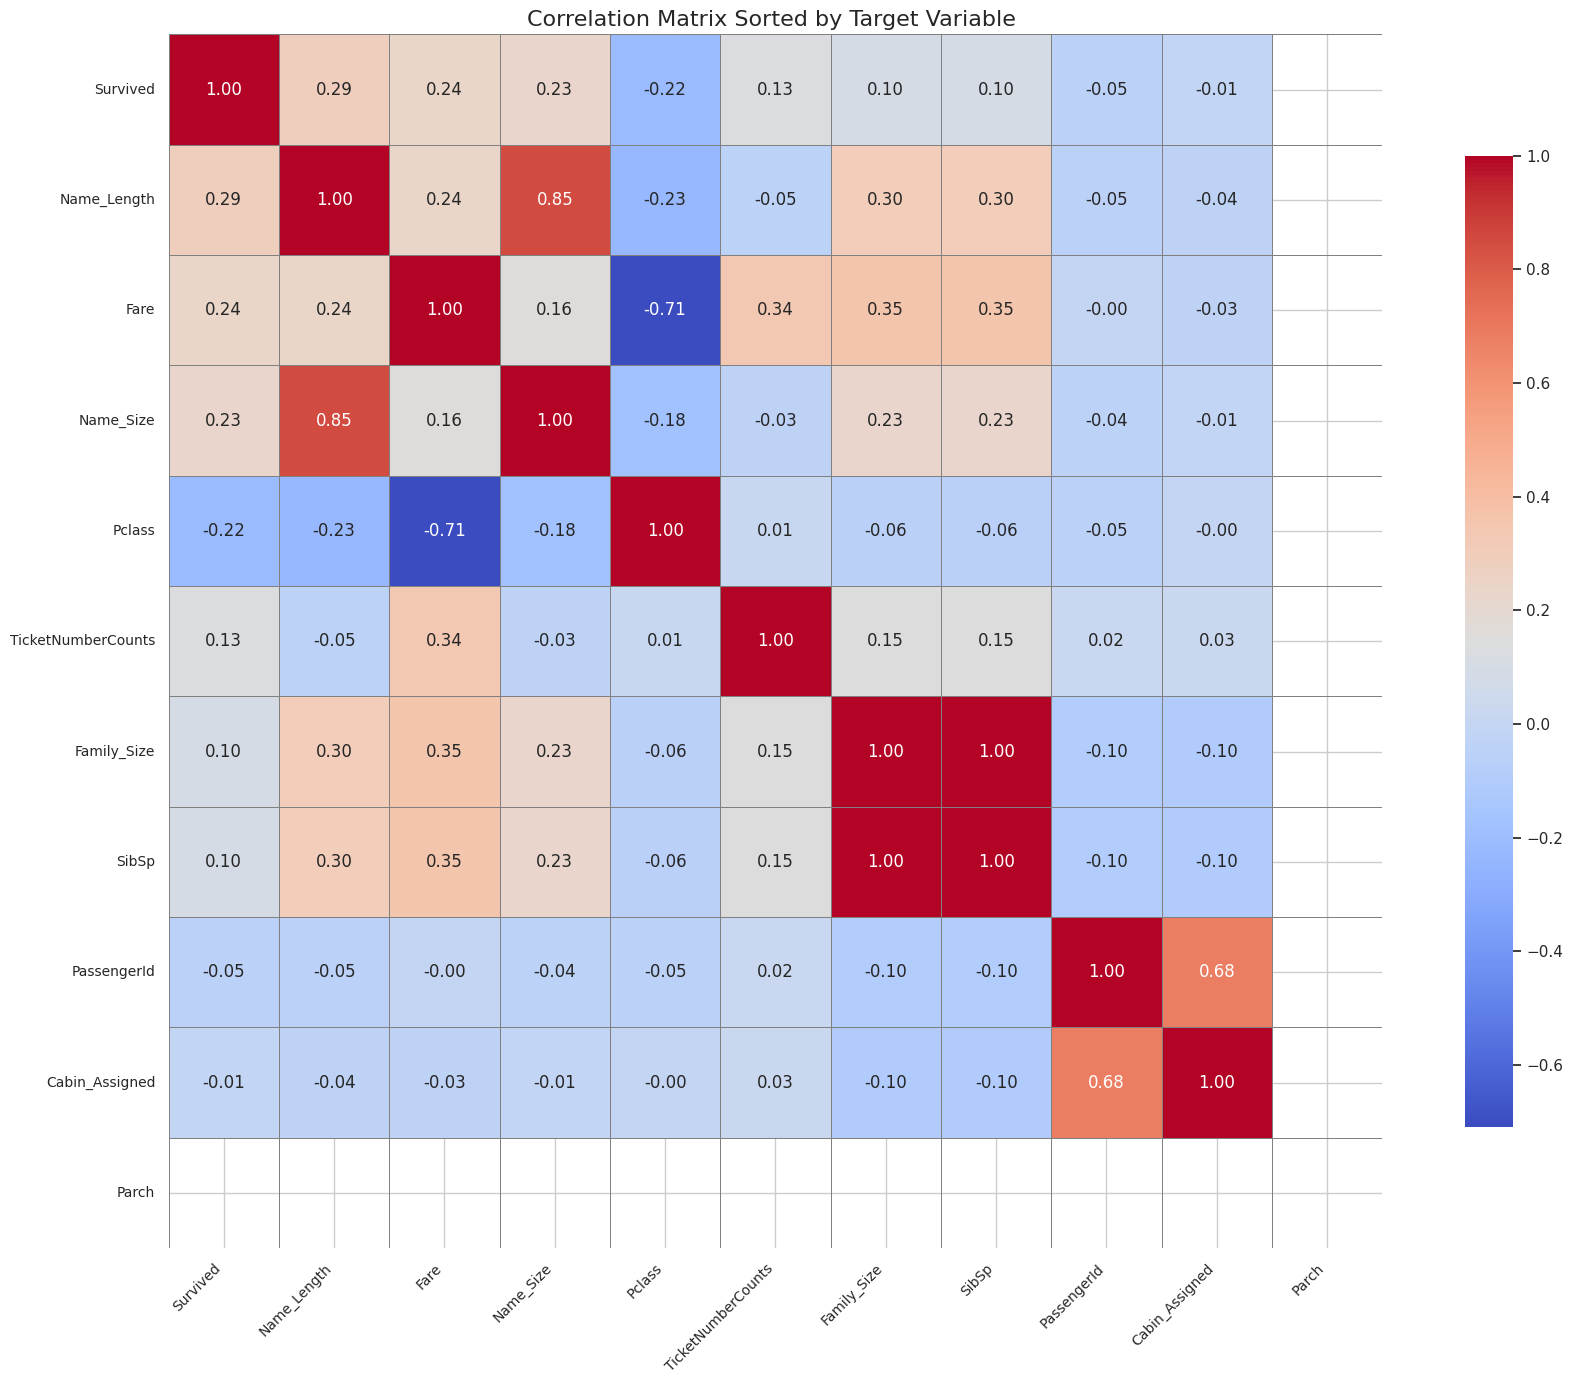

In [63]:
  # Compute correlation matrix (numeric columns only)
corr_matrix = train_df.corr(numeric_only=True)

# Sort correlations by absolute correlation with target ('SalePrice')
target = 'Survived'
sorted_features = corr_matrix[target].abs().sort_values(ascending=False).index
sorted_corr = corr_matrix.loc[sorted_features, sorted_features]

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))
plt.title('Correlation Matrix Sorted by Target Variable ', fontsize=16)

# Draw heatmap with annotations and mask
sns.heatmap(
    sorted_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Data Pipeline**

In [110]:
# Define columns for different transformations (restated for clarity as this block is standalone)
NUMERICAL_COLS = ['Age', 'Fare']
ORDINAL_COLS = ['Family_Size_Grouped', 'Pclass']  # Pclass is ordinal despite being numeric
OHE_COLS = ['Sex', 'Embarked', 'Cabin_Assigned']
PASSTHROUGH_COLS = ['Name_Size', 'TicketNumberCounts'] # Keeping these columns as they were created from other columns and should be numeric after binning/counting
TARGET = 'Survived'
# Check if KBinsDiscretizer output needs to be integer for certain downstream models
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    # Use 'uniform' or 'kmeans' strategy with 'ordinal' encode if bins have issues
    # Check if the number of bins (5) is appropriate for the data distribution
    ('discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # Drop one column for binary features to avoid multicollinearity (if_binary)
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'))
])

# Main column transformer (restated for clarity)
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, NUMERICAL_COLS),
    ('ord', ordinal_pipeline, ORDINAL_COLS),
    ('ohe', ohe_pipeline, OHE_COLS),
    ('pass', 'passthrough', PASSTHROUGH_COLS) # Pass these engineered numerical columns through
], remainder='drop') # Explicitly drop unused columns like 'Name', 'Ticket', 'PassengerId', etc.

# Full pipeline with feature selection and model
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))
])

**Data Preparation | Modeling**

In [89]:
# Data preparation
X = train_df.drop(TARGET, axis=1)
y = train_df[TARGET]

In [90]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=21
)

**Evaluation**

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a model and print metrics
    Returns a dictionary of metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(report).transpose())
    print("\nConfusion Matrix:")
    print(cm)

    return {
        'model': str(model),
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }

**Model Building**

In [114]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    # Corrected parameter name and values based on SGDClassifier documentation
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1] if 'constant' in ['constant', 'optimal', 'invscaling', 'adaptive'] else [None], # eta0 is used when learning_rate is 'constant', 'invscaling' or 'adaptive'
    'class_weight': [None, 'balanced']
}

# Apply the preprocessor to transform the data before GridSearchCV
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print("Training SGD Classifier...")
# Use the processed data for GridSearchCV
sgd_grid = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
sgd_grid.fit(X_train_processed, y_train)

best_sgd = sgd_grid.best_estimator_
print(f"Best parameters: {sgd_grid.best_params_}")

print("\nEvaluating SGD Classifier:")
# Use the processed data for evaluation
sgd_metrics = evaluate_model(best_sgd, X_test_processed, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Training SGD Classifier...
Best parameters: {'alpha': 0.1, 'class_weight': None, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l2'}

Evaluating SGD Classifier:
Accuracy: 0.8250

Classification Report:
              precision    recall  f1-score  support
0              0.838710  0.928571  0.881356   84.000
1              0.777778  0.583333  0.666667   36.000
accuracy       0.825000  0.825000  0.825000    0.825
macro avg      0.808244  0.755952  0.774011  120.000
weighted avg   0.820430  0.825000  0.816949  120.000

Confusion Matrix:
[[78  6]
 [15 21]]
